This notebook was used ofr the same purpose at results_analysis. But this was specifcally used to study the simulations and posteriors from R1. This data contains ALL the metrics. Last r1 simulations that will be done. data_name = "nb_r1_sim_complete"

In [1]:
print("Hello")

import numpy as np
import torch
from Utils import *
from utils_plot import *

from sbi.inference import NPE, SNPE, simulate_for_sbi
from sbi.utils import BoxUniform, RestrictionEstimator
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)
#from sbi.inference.base import infer
from sbi import analysis as analysis
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

#from sbi.inference import prepare_for_sbi
print("After all the imports")

Hello
After all the imports


In [244]:
data_name = "nb_r1_sim_complete"
data_r1 = np.load(f'saved/sim/{data_name}.npz')

theta_r1 = torch.from_numpy(data_r1['theta'])
x_r1 = torch.from_numpy(data_r1['x'])
print("Data round1 loaded", theta_r1.shape, x_r1.shape)
mask_notnan = torch.isfinite(x_r1).all(dim=1)
# Select only rows without `inf` values
x_r1_notnan = x_r1[mask_notnan]
theta_r1_notnan = theta_r1[mask_notnan]

Data round1 loaded torch.Size([350000, 8]) torch.Size([350000, 18])


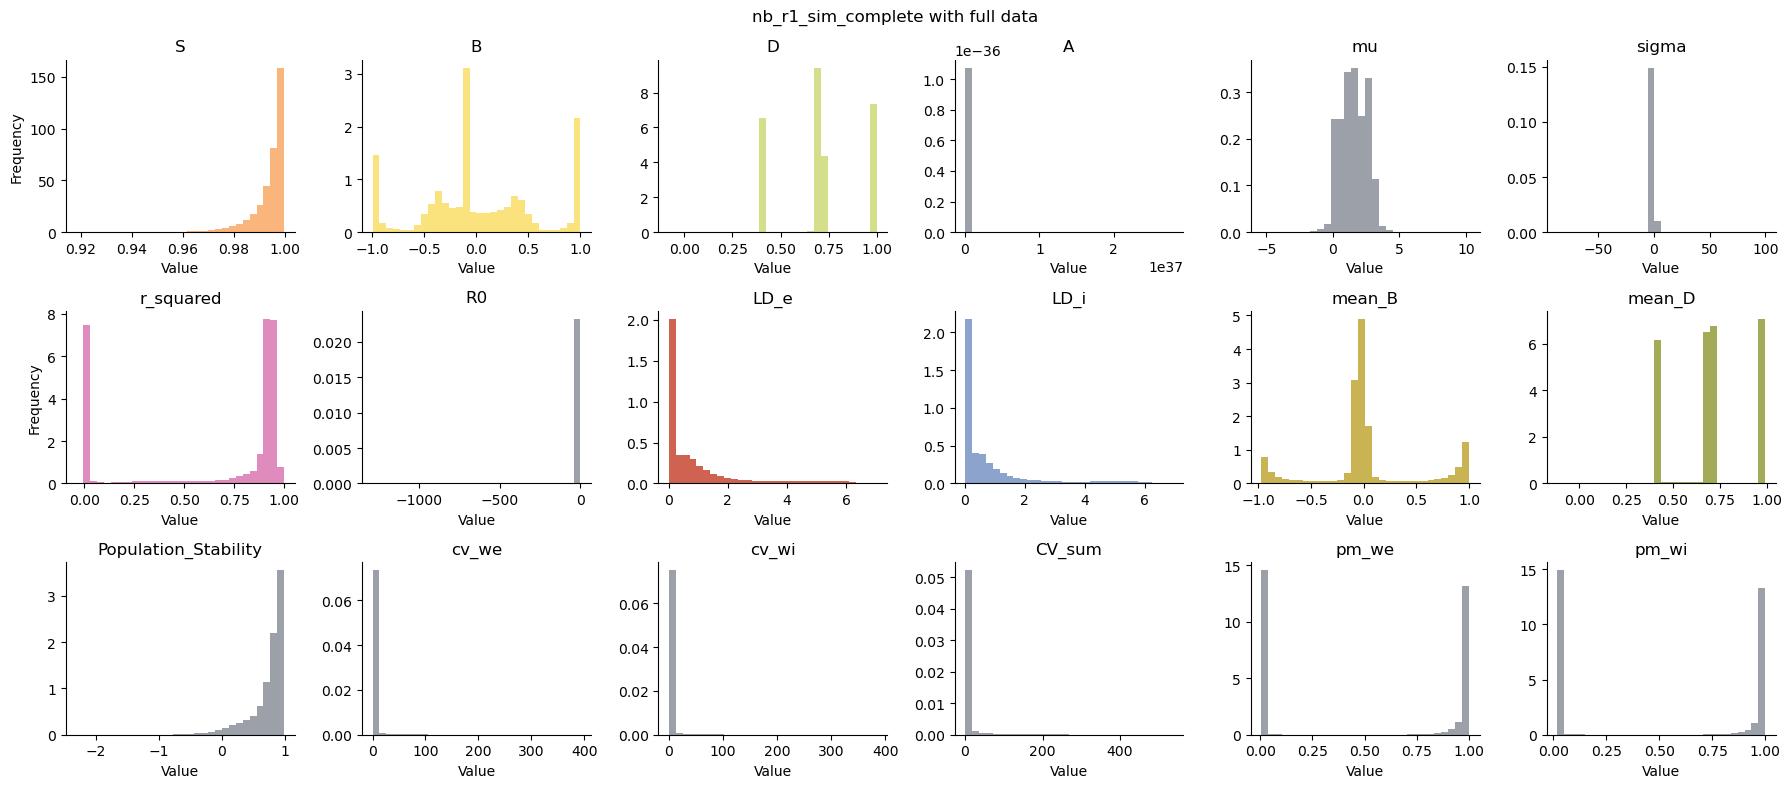

In [247]:
# S, B, D, A, mu, sigma, r_squared, R0, LD_e, LD_i, mean_B, mean_D, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi
metrics = [x_r1_notnan[:,i] for i in range(18)]
metrics_labels = ["S", "B", "D", "A", "mu", "sigma", "r_squared", "R0", "LD_e", "LD_i", "mean_B", "mean_D", "Population_Stability", "cv_we", "cv_wi", "CV_sum", "pm_we", "pm_wi"]
colors = ['#F89644', '#F8D644', '#C4D058', "#727884", "#727884", "#727884", "#D35AA3", "#727884",'#BB1F06', "#5A7CB9", "#B39309", "#7D8813", "#727884", "#727884", "#727884", "#727884", "#727884", "#727884"]
# Create a figure with 7 subplots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 8))

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()
# Plot each metric as a histogram in a different subplot
for i in range(18):
    ax = axes[i]
    ax.hist(metrics[i], bins=30, alpha=0.7, color=colors[i], density=True)
    ax.set_title(metrics_labels[i])
    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[6].set_ylabel('Frequency')
plt.suptitle(f'{data_name} with full data')
plt.tight_layout()
plt.show()


In [21]:
xr1_lde_01 = x_r1_notnan[x_r1_notnan[:, 16] > 0.2]
print("xr1_lde_01", xr1_lde_01.shape)

xr1_lde_01 torch.Size([179847, 18])


In [21]:
xr1_pmwe_09 = x_r1_notnan[x_r1_notnan[:, 16] > 0.9]
xr1_pmwepmwi_09 = xr1_pmwe_09[xr1_pmwe_09[:, 17] > 0.9]
thetar1_pmwe_09 = theta_r1_notnan[x_r1_notnan[:, 16] > 0.9]
thetar1_pmwepmwi_09 = thetar1_pmwe_09[xr1_pmwe_09[:, 17] > 0.9]

In [23]:
samples_torch = thetar1_pmwepmwi_09[np.random.choice(len(xr1_pmwepmwi_09 ))]
samples = samples_torch.cpu().detach().numpy()
samples

array([-0.21813989,  0.03806996, -0.11839509,  0.9749756 , -0.9524095 ,
       -1.7426496 , -0.5079925 ,  1.99934   ], dtype=float32)

In [24]:
w_e, w_i, r, E_target, E_rates, I_rates, angle, S, B, D,  A, mu, sigma, r_squared, R0, mean_B, mean_D, LD_e, LD_i, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi = run_baseline_network(samples, sbi_run=False)


In [25]:
print("S: ", S, "B: ", B, "D: ", D)
#print("S:",S, "mean_B:", mean_B, "mean_ D:", mean_D)
print("A: ", A, "mu: ", mu, "sigma: ", sigma, "r_squared: ", r_squared, "R0: ", R0)
print("LD_e: ", LD_e, "LD_i: ", LD_i,"mean_B", mean_B, "mean_ D", mean_D )
print("Population_Stability: ", Population_Stability, "cv_we: ", cv_we, "cv_wi: ", cv_wi, "CV_sum: ", CV_sum)
print("pm_we: ", pm_we, "pm_wi: ", pm_wi)

S:  0.9953683321122356 B:  -0.9675879134348595 D:  0.9878377619029189
A:  21.54533728661458 mu:  12.295062487207462 sigma:  33.820386830480686 r_squared:  0.0030533480447273442 R0:  -20.877445806972393
LD_e:  0.027225211371905412 LD_i:  0.9204957417115363 mean_B -0.9152335276435415 mean_ D 0.9844760684689929
Population_Stability:  0.8393815975938239 cv_we:  0.018681462322021856 cv_wi:  0.14193873192397521 CV_sum:  0.16062019424599708
pm_we:  0.9998320198941226 pm_wi:  0.9944397696546803


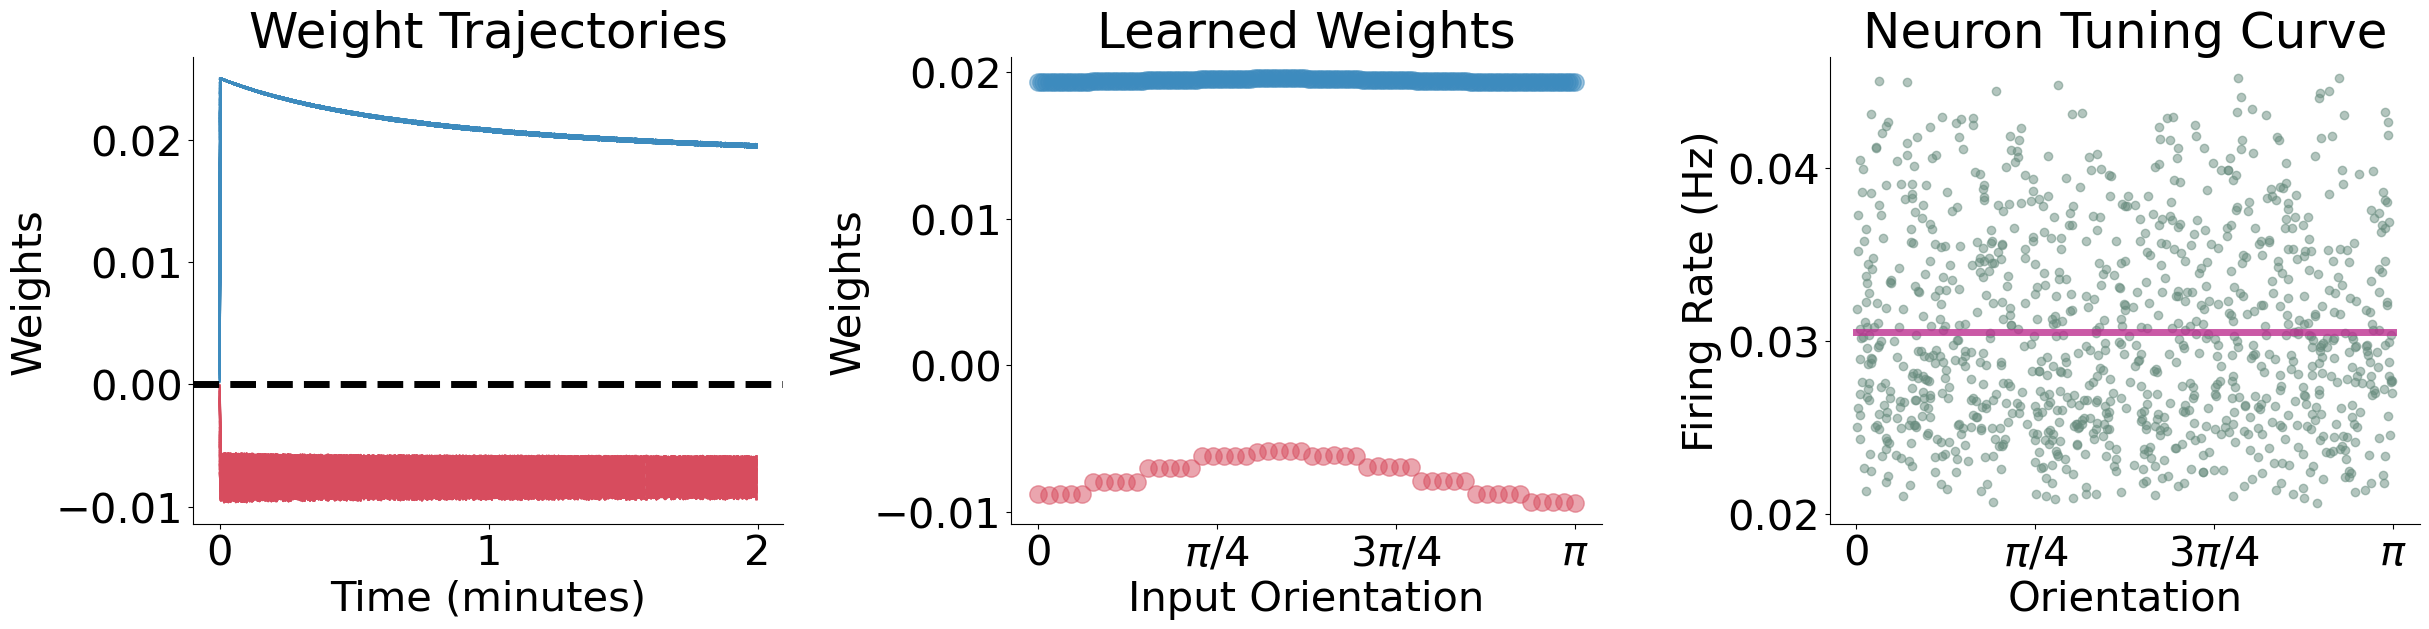

In [26]:
samples_plot(w_e, w_i, r, angle)

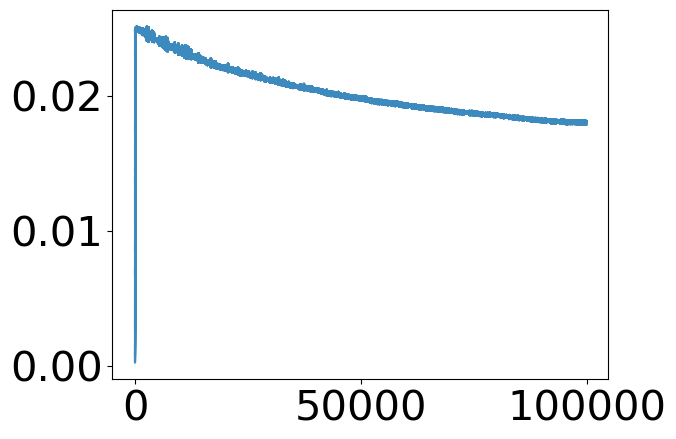

In [ ]:
time = 100000 # ms
dt = 0.1  # ms
timesteps=int(time/dt)
plt.plot(np.linspace(0, time, timesteps)[::2000], w_e[::2000], color = '#3d8bbeff', alpha = 0.8)
np.sum(w_e[::2000])

In [58]:
np.mean(w_e[::2000])

0.0202922888995325

In [21]:
xr1_ps_09 = x_r1_notnan[x_r1_notnan[:, 12] > 0.9]
thetar1_ps_09 = theta_r1_notnan[x_r1_notnan[:, 12] > 0.9]
samples_torch = thetar1_ps_09[np.random.choice(len(xr1_ps_09))]
samples = samples_torch.cpu().detach().numpy()
samples

array([ 0.6109123 , -1.4728541 ,  1.2106771 , -0.80094385,  0.21305108,
       -0.87545824,  0.63529134, -0.7738044 ], dtype=float32)

IndexError: too many indices for array: array is 1-dimensional, but 4 were indexed

In [22]:
w_e, w_i, r, E_target, E_rates, I_rates, angle, S, B, D,  A, mu, sigma, r_squared, R0, mean_B, mean_D, LD_e, LD_i, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi = run_baseline_network(samples, sbi_run=False)


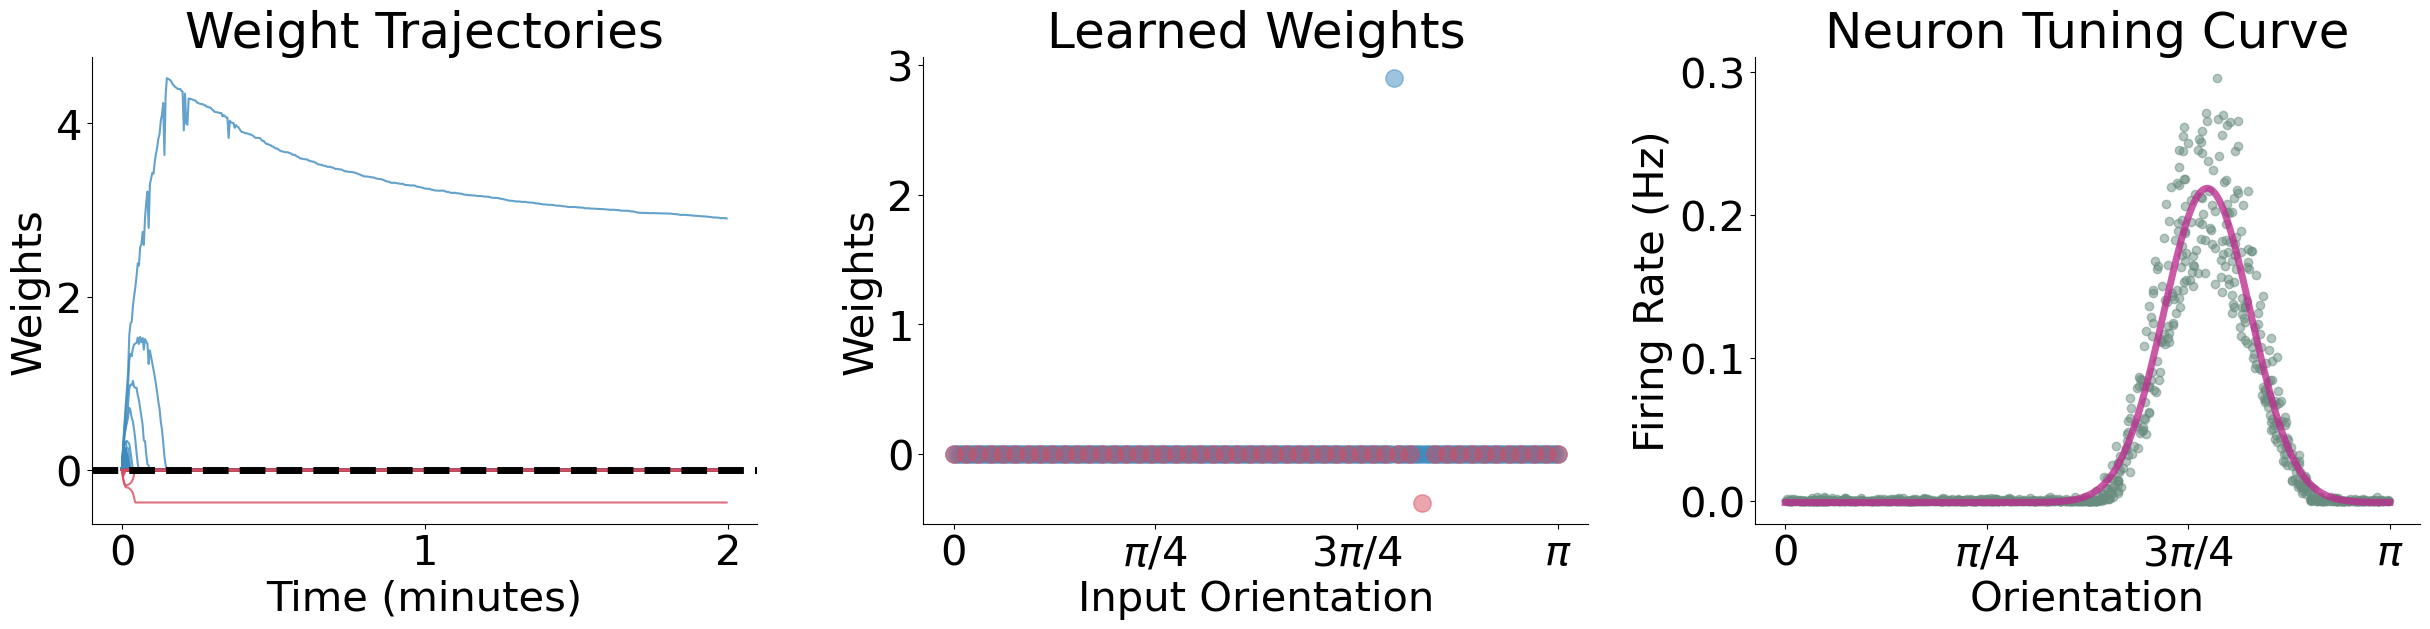

In [23]:
samples_plot(w_e, w_i, r, angle)

In [24]:
print("S: ", S, "B: ", B, "D: ", D)
#print("S:",S, "mean_B:", mean_B, "mean_ D:", mean_D)
print("A: ", A, "mu: ", mu, "sigma: ", sigma, "r_squared: ", r_squared, "R0: ", R0)
print("LD_e: ", LD_e, "LD_i: ", LD_i,"mean_B", mean_B, "mean_ D", mean_D )
print("Population_Stability: ", Population_Stability, "cv_we: ", cv_we, "cv_wi: ", cv_wi, "CV_sum: ", CV_sum, "pm_we: ", pm_we, "pm_wi: ", pm_wi)

S:  0.9995165816390147 B:  1.0 D:  0.4052915607250468
A:  0.7400836436121544 mu:  2.1928867832171237 sigma:  0.22486101558217453 r_squared:  0.9402114678897537 R0:  -0.002753852183281097
LD_e:  0.0011331335431035584 LD_i:  4.531522548735181e-17 mean_B 1.0 mean_ D 0.4052915607250469
Population_Stability:  0.9682917531408003 cv_we:  0.0001585412342959982 cv_wi:  1.4823210297234091e-18 CV_sum:  0.0001585412342959997 pm_we:  0.005 pm_wi:  0.02


In [16]:
np.random.choice(len(xr1_ps_09))

7453

## Balance and diveristy

In [44]:
xr1_b_09 = x_r1_notnan[x_r1_notnan[:, 1] > 0.9]
xr1_bs_09 = xr1_b_09[xr1_b_09[:, 2] > 0.9]
thetar1_b_09 = theta_r1_notnan[x_r1_notnan[:, 1] > 0.9]
thetar1_bs_09 = thetar1_b_09[xr1_b_09[:, 2] > 0.9]

In [49]:
idx = np.random.choice(len(xr1_bs_09))
samples_torch = thetar1_bs_09[idx]
samples = samples_torch.cpu().detach().numpy()
print("Samples", samples)
print(xr1_bs_09[idx])

Samples [ 1.2920876   1.9073045  -0.29716802  1.5834658   1.5841813   0.46677494
  0.04764509  1.6427896 ]
tensor([ 9.9633e-01,  9.7698e-01,  9.8413e-01, -3.3217e-02,  9.0464e-01,
         2.1782e+00,  2.9744e-04,  5.6190e-01,  8.2056e-01,  2.0950e-01,
         9.6429e-01,  9.8249e-01,  8.2693e-01,  1.3918e-01,  3.3892e-02,
         1.7307e-01,  9.9711e-01,  9.9909e-01])


In [50]:
w_e, w_i, r, E_target, E_rates, I_rates, angle, S, B, D,  A, mu, sigma, r_squared, R0, mean_B, mean_D, LD_e, LD_i, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi = run_baseline_network(samples, sbi_run=False)


In [51]:
print("S: ", S, "B: ", B, "D: ", D)
#print("S:",S, "mean_B:", mean_B, "mean_ D:", mean_D)
print("A: ", A, "mu: ", mu, "sigma: ", sigma, "r_squared: ", r_squared, "R0: ", R0)
print("LD_e: ", LD_e, "LD_i: ", LD_i,"mean_B", mean_B, "mean_ D", mean_D )
print("Population_Stability: ", Population_Stability, "cv_we: ", cv_we, "cv_wi: ", cv_wi, "CV_sum: ", CV_sum)
print("pm_we: ", pm_we, "pm_wi: ", pm_wi)

S:  0.9963271965368375 B:  0.976377872144988 D:  0.9853762526298163
A:  -0.01315639388203669 mu:  1.0378609351757255 sigma:  0.2678211060673124 r_squared:  0.0010095204722945228 R0:  0.5914267556690058
LD_e:  0.8491431688416098 LD_i:  0.2156512614404394 mean_B 0.9672419208230361 mean_ D 0.9828858589972272
Population_Stability:  0.8265136613272548 cv_we:  0.1395278611676745 cv_wi:  0.03395828374851428 CV_sum:  0.17348614491618877
pm_we:  0.997830329528679 pm_wi:  0.9993586381917333


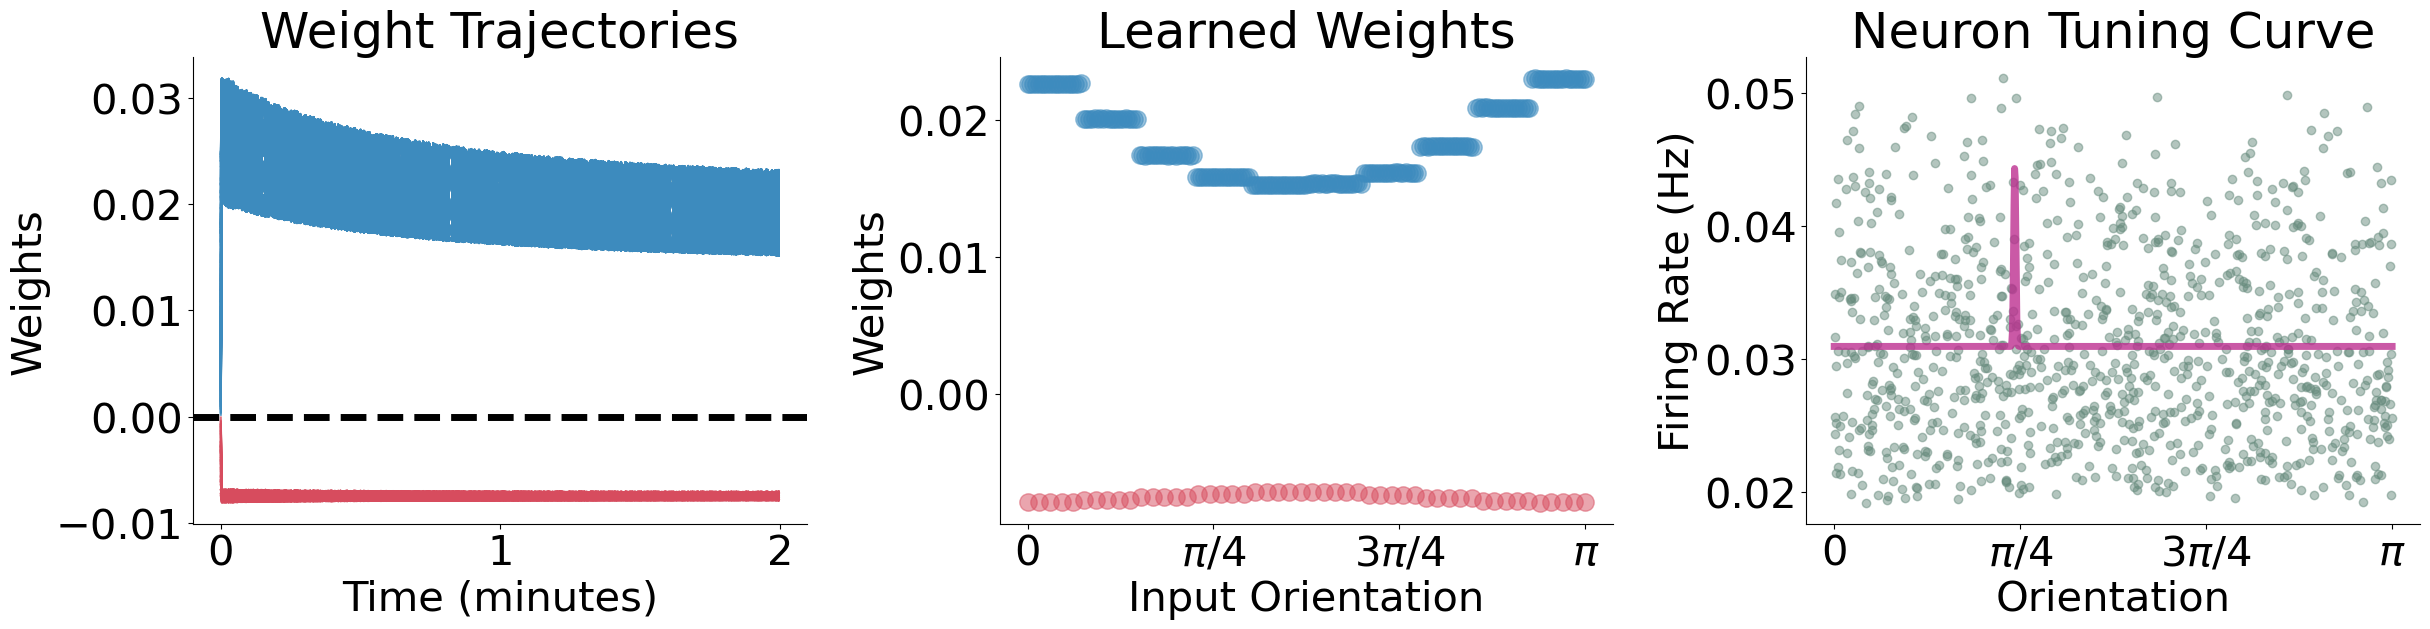

In [52]:
samples_plot(w_e, w_i, r, angle)

## Filter on population stability

In [66]:
xr1_ps_09 = x_r1_notnan[x_r1_notnan[:, 12] > 0.9]
thetar1_ps_09 = theta_r1_notnan[x_r1_notnan[:, 12] > 0.9]

In [67]:
idx = np.random.choice(len(xr1_ps_09))
samples_torch = thetar1_ps_09[idx]
samples = samples_torch.cpu().detach().numpy()
print("Samples", samples)
print(xr1_ps_09[idx])

Samples [ 1.5610695 -0.2921102 -0.8769188  1.188369   1.9337659 -1.0810878
 -1.5659373 -0.8404443]
tensor([ 9.9925e-01,  2.9944e-01,  7.0957e-01,  7.4458e-01,  2.1977e+00,
         3.3416e-01,  9.5900e-01,  3.0038e-04,  1.9922e-01,  3.3986e-17,
        -4.0474e-02,  7.0856e-01,  9.6027e-01,  3.9733e-02,  1.4808e-18,
         3.9733e-02,  9.8887e-01,  2.0000e-02])


In [68]:
w_e, w_i, r, E_target, E_rates, I_rates, angle, S, B, D,  A, mu, sigma, r_squared, R0, mean_B, mean_D, LD_e, LD_i, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi = run_baseline_network(samples, sbi_run=False)


In [69]:
print("S: ", S, "B: ", B, "D: ", D)
#print("S:",S, "mean_B:", mean_B, "mean_ D:", mean_D)
print("A: ", A, "mu: ", mu, "sigma: ", sigma, "r_squared: ", r_squared, "R0: ", R0)
print("LD_e: ", LD_e, "LD_i: ", LD_i,"mean_B", mean_B, "mean_ D", mean_D )
print("Population_Stability: ", Population_Stability, "cv_we: ", cv_we, "cv_wi: ", cv_wi, "CV_sum: ", CV_sum)
print("pm_we: ", pm_we, "pm_wi: ", pm_wi)

S:  0.9992660899778797 B:  -0.46960341741778455 D:  0.7097113804581417
A:  0.7780877126271062 mu:  -0.002706907739646353 sigma:  0.33335668353988146 r_squared:  0.9635590003491427 R0:  -0.0004415854453584169
LD_e:  0.17250437290164683 LD_i:  4.909149427796446e-17 mean_B -0.03800267212508764 mean_ D 0.7086395718593685
Population_Stability:  0.9610009086824333 cv_we:  0.03900753657834506 cv_wi:  1.4809485537782179e-18 CV_sum:  0.03900753657834506
pm_we:  0.989772028522023 pm_wi:  0.02


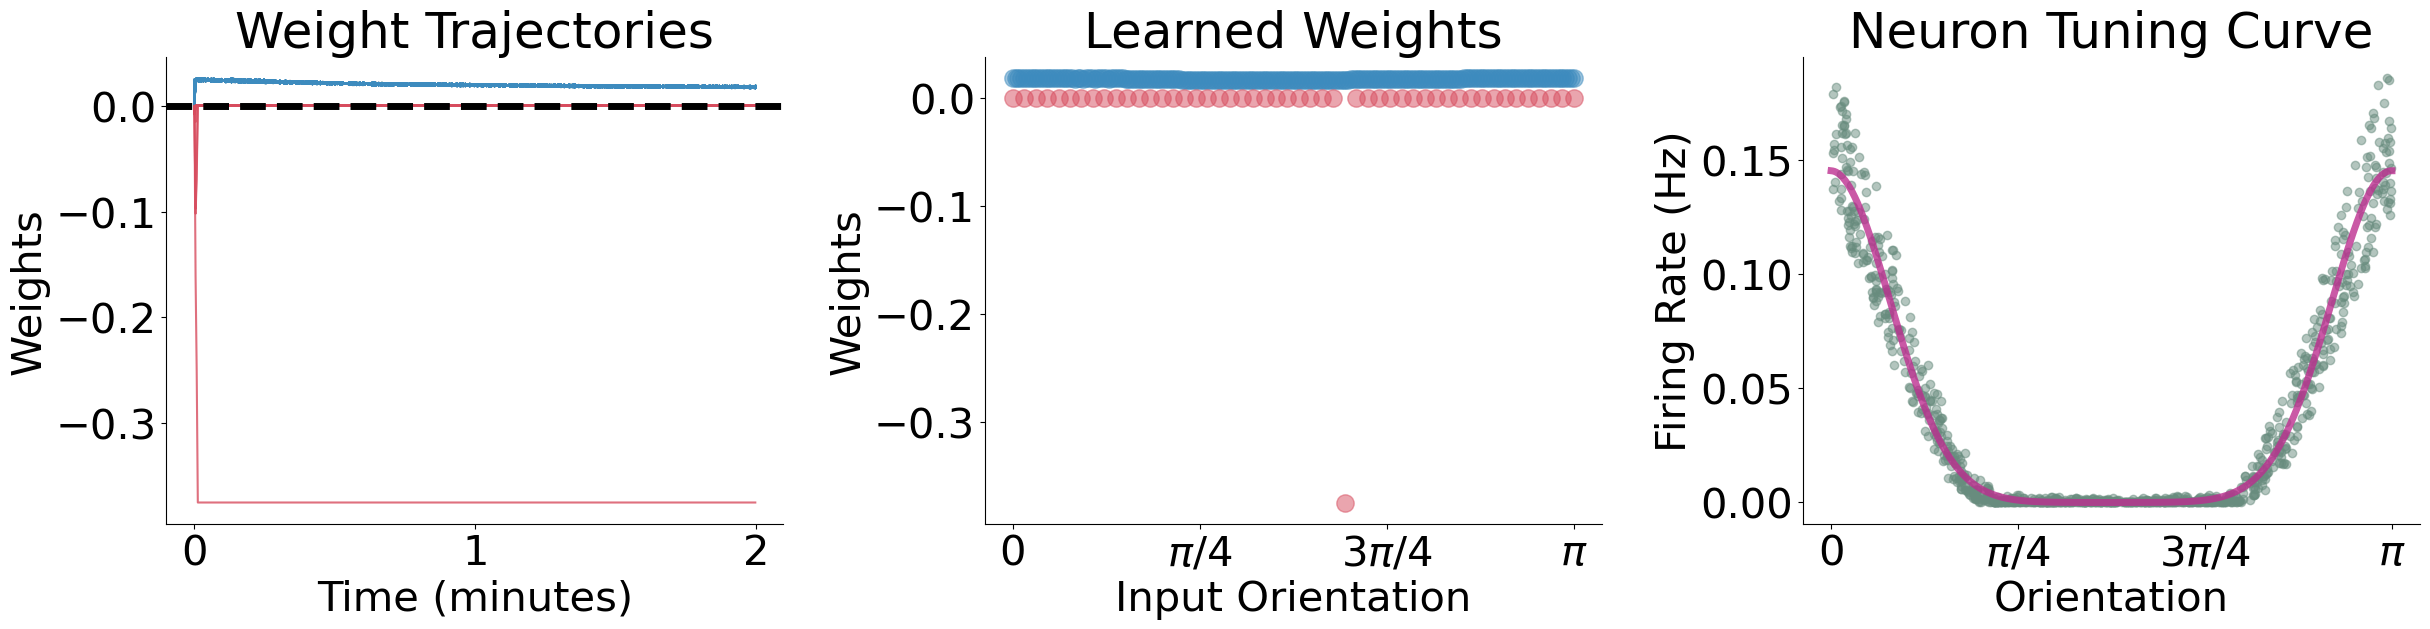

In [70]:
samples_plot(w_e, w_i, r, angle)

(0.0, 0.025)

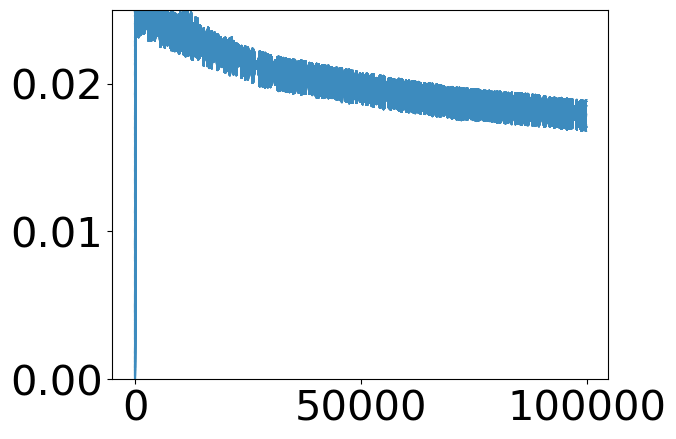

In [76]:
time = 100000 # ms
dt = 0.1  # ms
timesteps=int(time/dt)
plt.plot(np.linspace(0, time, timesteps)[::2000], w_e[::2000], color = '#3d8bbeff', alpha = 0.8)
plt.ylim(0, 0.025)

### Histograms

In [85]:
#Filter for Stability & Diversity
stability_mask = x_r1_notnan[:, 0] >= 0.9
balance_mask = x_r1_notnan[:, 1] >= 0.9
diversity_mask = x_r1_notnan[:, 2] >= 0.9

#sbd_mask = stability_mask & balance_mask & diversity_mask
#bd_mask = balance_mask & diversity_mask 


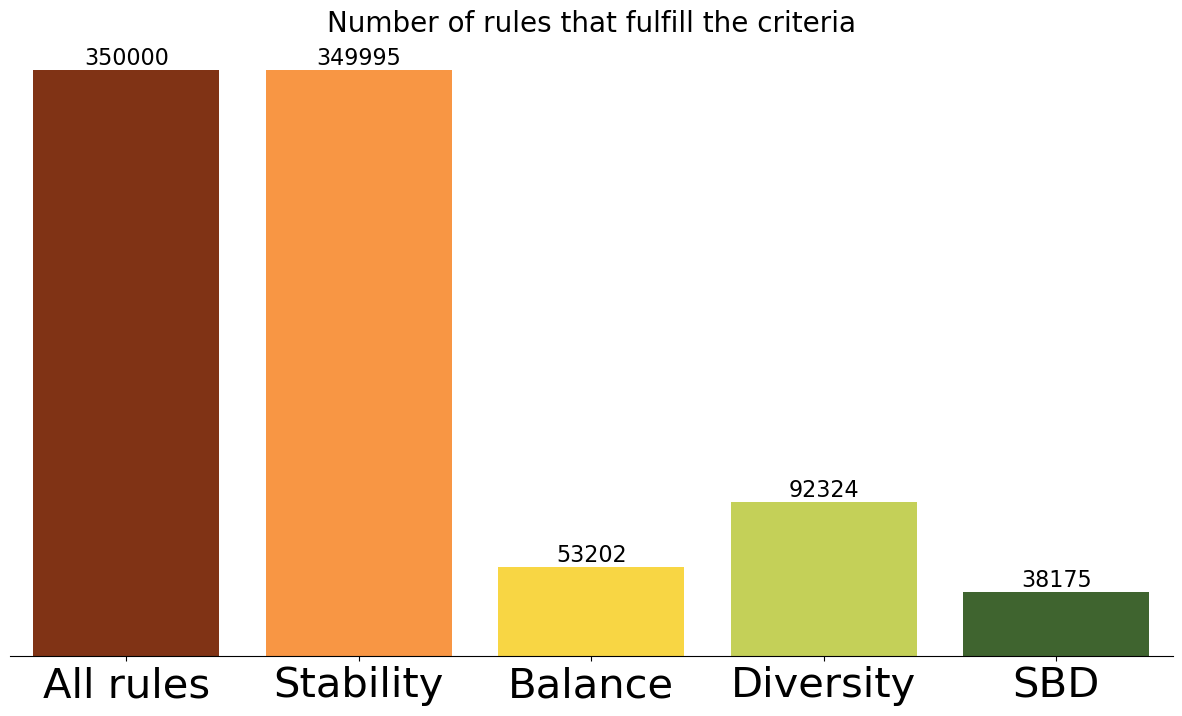

In [86]:
# SHOW NUMBER OF RULES THAT FULFILL ALL OF THE CRITERIO
all_rules = int(x_r1.shape[0])
s_rules = int(stability_mask.sum())
b_rules = int(balance_mask.sum())
d_rules = int(diversity_mask.sum())
sbd_rules = int(sbd_mask.sum())
sd_mask = stability_mask & diversity_mask
#sd_rules = int(sd_mask.sum())



fig, ax = plt.subplots(figsize=(15, 8))
bar_colors = ['#803315', '#F89644', '#F8D644', '#C4D058', '#3F642F', "grey", '#D35AA3']
#bar_colors = met_brew('Monet', n=5, brew_type='continuous')
bars = ax.bar(["All rules", "Stability", "Balance", "Diversity", "SBD"], [all_rules, s_rules, b_rules, d_rules, sbd_rules], color=bar_colors)
#ax.set_xlabel("Criteria")
#ax.set_ylabel("Number of rules")
plt.title("Number of rules that fulfill the criteria", size = 20)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])  # Remove left ticks
ax.set_xlim(-0.5, 4.5)
# Add the number of each bar at the top
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', size = 16)


plt.show()


In [90]:
#x_stable = x_r1_notnan[stability_mask]
x_st_diverse = x_r1_notnan[x_r1_notnan[:, 2] >= 0.9]
x_st_div_balance = x_st_diverse[x_st_diverse[:, 1] >= 0.9]

print(x_r1_notnan.shape, x_st_diverse.shape, x_st_div_balance.shape)

torch.Size([349995, 18]) torch.Size([92324, 18]) torch.Size([38175, 18])


In [92]:

x_b = x_r1_notnan[x_r1_notnan[:, 1] >= 0.9]
x_b_div = x_b[x_b[:, 2] >= 0.9]
print(x_b.shape, x_b_div.shape)

torch.Size([53202, 18]) torch.Size([38175, 18])


In [112]:
#x_stable = x_r1_notnan[stability_mask]
x_mean_diverse = x_r1_notnan[x_r1_notnan[:, 10] >= 0.9]
x_mean_div_balance = x_mean_diverse[x_mean_diverse[:, 11] >= 0.9]
print(x_r1_notnan.shape, x_mean_diverse.shape, x_mean_div_balance.shape)

torch.Size([349995, 18]) torch.Size([35136, 18]) torch.Size([20670, 18])


### Sample from posterior filtered and train on db 90

In [4]:
# Load pickle data
with open("saved/results/nb_r1_posterior_complete_trainbd90.pkl", "rb") as file:
    posterior_r1 = pickle.load(file)

print("Posterior round1 loaded", posterior_r1)

Posterior round1 loaded Posterior p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


In [10]:
# observation of S = 0 and B = 0
observation = torch.zeros(2, ) + 1
#observation = torch.tensor([0.9, 0.9, 0.9])
samples_torch = posterior_r1.sample((1,), x=observation)
samples = samples_torch.cpu().detach().numpy()[0]
print(samples)

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

[ 1.5244097   1.0013822  -0.63098687 -0.08384571 -1.3983526   1.8335817
 -0.98391926 -0.43140537]


In [11]:
w_e, w_i, r, E_target, E_rates, I_rates, angle, S, B, D,  A, mu, sigma, r_squared, R0, mean_B, mean_D, LD_e, LD_i, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi = run_baseline_network(samples, sbi_run=False)


In [12]:
print("S: ", S, "B: ", B, "D: ", D)
#print("S:",S, "mean_B:", mean_B, "mean_ D:", mean_D)
print("A: ", A, "mu: ", mu, "sigma: ", sigma, "r_squared: ", r_squared, "R0: ", R0)
print("LD_e: ", LD_e, "LD_i: ", LD_i,"mean_B", mean_B, "mean_ D", mean_D )
print("Population_Stability: ", Population_Stability, "cv_we: ", cv_we, "cv_wi: ", cv_wi, "CV_sum: ", CV_sum)
print("pm_we: ", pm_we, "pm_wi: ", pm_wi)

S:  0.9685414672268987 B:  0.9912791698849952 D:  0.9949613405721942
A:  0.08342428785513645 mu:  0.2842311719374544 sigma:  0.06050885759912468 r_squared:  0.007212666642253618 R0:  0.1212746663875996
LD_e:  3.612938429446293 LD_i:  5.334789717869012 mean_B 0.8994476236560659 mean_ D 0.9876415341517437
Population_Stability:  -0.26406326520560164 cv_we:  0.5497843722431583 cv_wi:  0.7149936934519501 CV_sum:  1.2647780656951084
pm_we:  0.9618758023090266 pm_wi:  0.9647369743584758


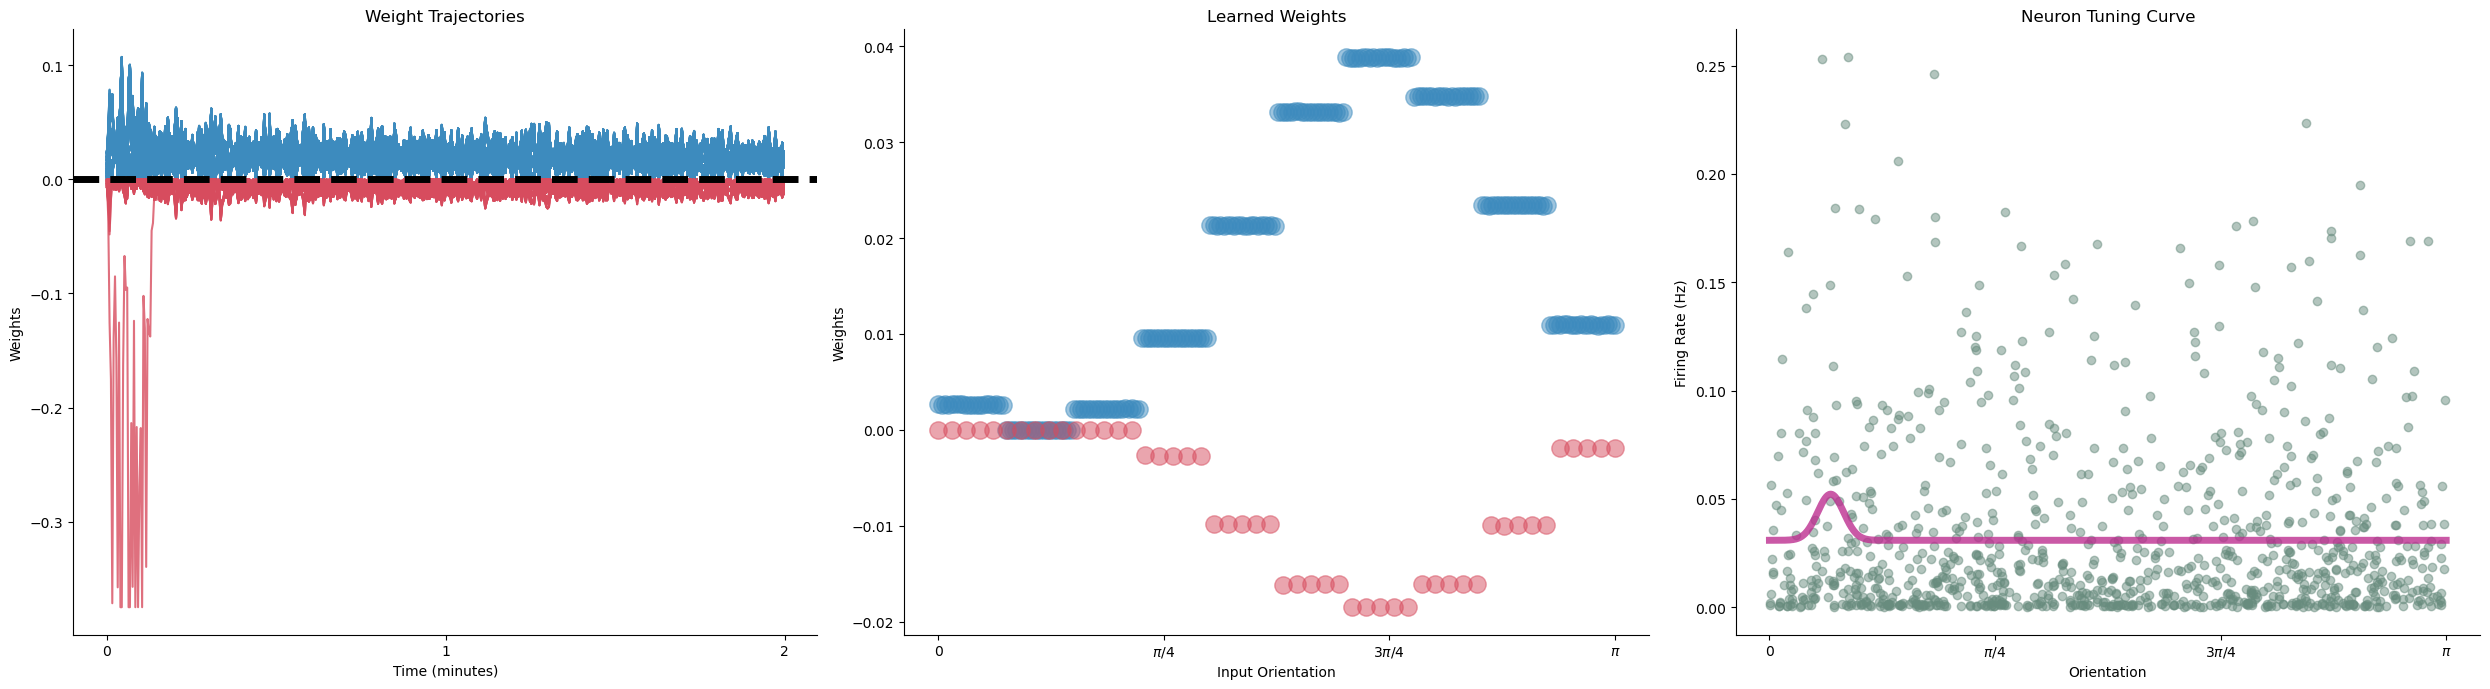

In [13]:
samples_plot(w_e, w_i, r, angle)

In [16]:
1/(cv_we/200)

1658.8314915045871

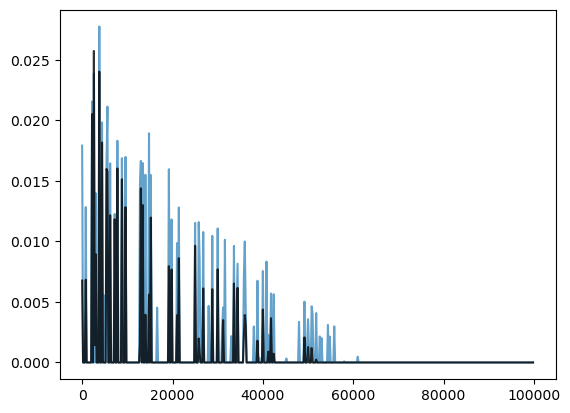

In [47]:
plt.plot(np.linspace(0, time, timesteps)[::2000], w_e[::2000][:,0], color = '#3d8bbeff', alpha = 0.8)
plt.plot(np.linspace(0, time, timesteps)[::2000], w_e[::2000][:,21], color = 'black', alpha = 0.8)


In [28]:
timesteps

NameError: name 'timesteps' is not defined

In [25]:
print(np.mean(w_e[::2000][:,0]))
print(np.mean(w_e[::2000][:,21]))

0.021891626525529156
0.02187341127001999


In [37]:
Groups = 10
WE_last = np.reshape(w_e[-1], (Groups, len(w_e[-1])//Groups))
WI_last = np.reshape(w_i[-1], (Groups, len(w_i[-1])//Groups))
WE_last.shape

(10, 20)

In [34]:
np.std(WE_last)

0.000838961507745153

In [35]:
D_e = np.sum(np.std(WE_last, axis = 1))/(Groups*np.std(WE_last))
D_i = np.sum(np.std(WI_last, axis = 1))/(Groups*np.std(WI_last))
print(D_e, D_i)

0.004305413838278664 0.008325372463761135


In [38]:
D_e = np.sum(np.std(WE_last, axis = 1))/(np.std(WE_last))
D_i = np.sum(np.std(WI_last, axis = 1))/(np.std(WI_last))
print(D_e, D_i)
1- (D_e + D_i)

0.043054138382786634 0.08325372463761134


0.873692136979602

In [18]:
np.std(WE_last)

0.0005076970474314081

In [20]:
D_e = np.sum(np.std(WE_last, axis = 1)/(np.std(WE_last)))
D_i = np.sum(np.std(WI_last, axis = 1)/(np.std(WI_last)))
print(D_e, D_i)
1- (D_e + D_i)

0.04388669937161373 0.0716436309757256


0.8844696696526607

Drawing 350000 posterior samples:   0%|          | 0/350000 [00:00<?, ?it/s]

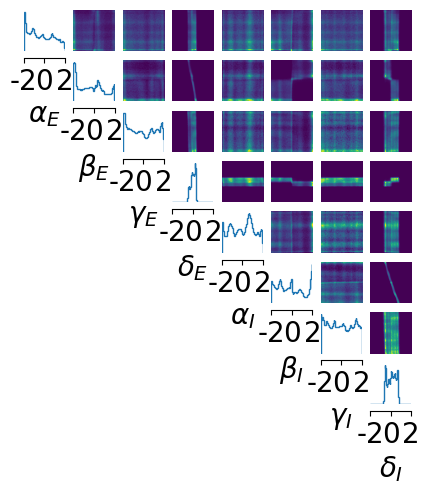

In [40]:
plt.rcParams.update({'font.size': 20})
observation = torch.zeros(2, ) + 1

samples_p1 = posterior_r1.sample((350000,), x=observation)
labels = [r'$\alpha_E$', r'$\beta_E$', r'$\gamma_E$', r'$\delta_E$', 
    r'$\alpha_I$', r'$\beta_I$', r'$\gamma_I$', r'$\delta_I$']
# Plotting 
# plot posterior samples
_ = analysis.pairplot(
    samples_p1, limits=[[-2,2], [-2,2], [-2,2], [-2,2], [-2,2], [-2,2], [-2,2], [-2,2]], figsize=(5, 5), labels=labels
)

In [9]:
time = 100000 # ms
dt = 0.1  # ms
timesteps=int(time/dt)
pulse_time = 50
half_timesteps = int(timesteps / 2)
np.count_nonzero(np.mean(w_e[-half_timesteps:], axis = 0) <= 0.005)

0

In [27]:
np.mean(w_e[-half_timesteps:], axis = 0)

array([0.00436284, 0.0043591 , 0.00436123, 0.0043623 , 0.00435723,
       0.00435161, 0.00436657, 0.00436786, 0.0043575 , 0.00435678,
       0.00436176, 0.00435972, 0.00436928, 0.00436786, 0.00436667,
       0.00435308, 0.00436654, 0.00436894, 0.00436653, 0.00437304,
       0.00408558, 0.00409403, 0.00408388, 0.00408463, 0.00408851,
       0.00409218, 0.00409148, 0.00408367, 0.00408911, 0.00408988,
       0.00408629, 0.00408196, 0.0040892 , 0.00408814, 0.00408524,
       0.00408558, 0.00408814, 0.00409373, 0.00409016, 0.00408842,
       0.00622293, 0.00630116, 0.0062329 , 0.00633081, 0.00648018,
       0.00639639, 0.00641822, 0.0064645 , 0.00633017, 0.00642562,
       0.00627773, 0.0064244 , 0.00624886, 0.00632515, 0.00641968,
       0.00643862, 0.00635394, 0.00636283, 0.00635069, 0.00632518,
       0.00631979, 0.0063094 , 0.00631346, 0.00632618, 0.00633396,
       0.00632134, 0.00634026, 0.00633283, 0.00633723, 0.00630648,
       0.00632668, 0.00633893, 0.00634055, 0.00631382, 0.00631

### Sample from posterior filtered and train on mean db 90

In [12]:
# Load pickle data
with open("saved/results/nb_r1_posterior_complete_trainmeanbd90.pkl", "rb") as file:
    posterior_r1 = pickle.load(file)

print("Posterior round1 loaded", posterior_r1)

Posterior round1 loaded Posterior p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


In [13]:
# observation of S = 0 and B = 0
observation = torch.zeros(2, ) + 1
#observation =  torch.zeros(1, ) + 1
samples_torch = posterior_r1.sample((1,), x=observation)
samples = samples_torch.cpu().detach().numpy()[0]
print(samples)

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

[-1.8823082  -1.3029835  -1.6845455  -0.59783095  1.9395318  -0.7471839
  0.41554618 -0.5823763 ]


In [14]:
w_e, w_i, r, E_target, E_rates, I_rates, angle, S, B, D,  A, mu, sigma, r_squared, R0, mean_B, mean_D, LD_e, LD_i, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi = run_baseline_network(samples, sbi_run=False)


In [15]:
print("S: ", S, "B: ", B, "D: ", D)
#print("S:",S, "mean_B:", mean_B, "mean_ D:", mean_D)
print("A: ", A, "mu: ", mu, "sigma: ", sigma, "r_squared: ", r_squared, "R0: ", R0)
print("LD_e: ", LD_e, "LD_i: ", LD_i,"mean_B", mean_B, "mean_ D", mean_D )
print("Population_Stability: ", Population_Stability, "cv_we: ", cv_we, "cv_wi: ", cv_wi, "CV_sum: ", CV_sum)
print("pm_we: ", pm_we, "pm_wi: ", pm_wi)

S:  0.9994445243386674 B:  -0.11111111111111104 D:  0.4052915607250468
A:  0.6818997074581199 mu:  0.23082705324435543 sigma:  0.2132100559518322 r_squared:  0.929876554898212 R0:  -0.0004639768655167845
LD_e:  0.0013065866921155586 LD_i:  2.265761274367591e-17 mean_B -0.11111111111111115 mean_ D 0.4052915607250469
Population_Stability:  0.9618409147884976 cv_we:  0.00019079542605751135 cv_wi:  1.4828590247265745e-18 CV_sum:  0.00019079542605751284
pm_we:  0.005 pm_wi:  0.02


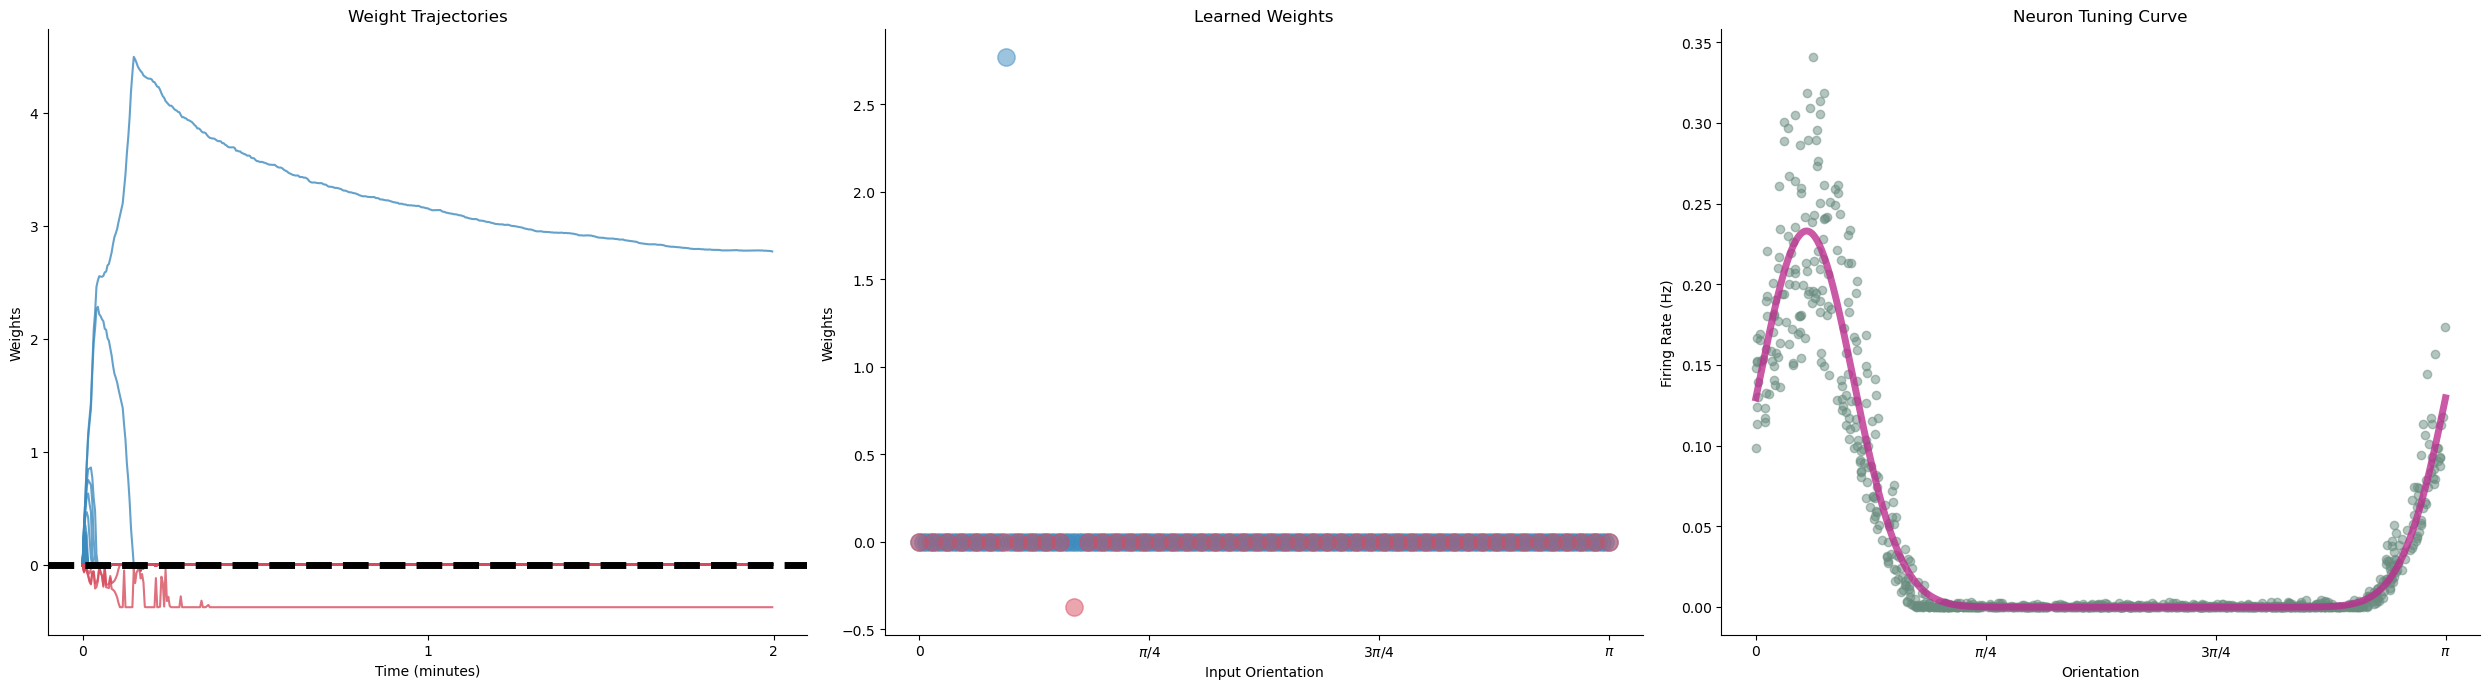

In [16]:
samples_plot(w_e, w_i, r, angle)

In [ ]:
w_e

(1000000, 200)

Drawing 350000 posterior samples:   0%|          | 0/350000 [00:00<?, ?it/s]

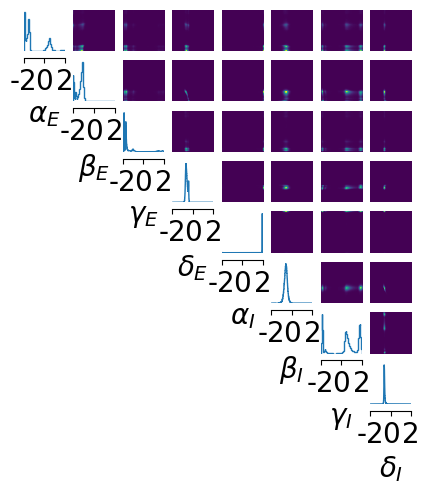

In [30]:
plt.rcParams.update({'font.size': 20})
observation = torch.zeros(2, ) + 1

samples_p1 = posterior_r1.sample((350000,), x=observation)
labels = [r'$\alpha_E$', r'$\beta_E$', r'$\gamma_E$', r'$\delta_E$', 
    r'$\alpha_I$', r'$\beta_I$', r'$\gamma_I$', r'$\delta_I$']
# Plotting 
# plot posterior samples
_ = analysis.pairplot(
    samples_p1, limits=[[-2,2], [-2,2], [-2,2], [-2,2], [-2,2], [-2,2], [-2,2], [-2,2]], figsize=(5, 5), labels=labels
)

## R2 train bd 90

In [68]:
data_name = "nb_r2_sim_complete_trainbd90"
data_r2 = np.load(f'saved/sim/{data_name}.npz')

theta_r2 = torch.from_numpy(data_r2['theta'])
x_r2 = torch.from_numpy(data_r2['x'])
print("Data round1 loaded", theta_r2.shape, x_r2.shape)
mask_notnan = torch.isfinite(x_r2).all(dim=1)
# Select only rows without `inf` values
x_r2_notnan = x_r2[mask_notnan]
theta_r2_notnan = theta_r2[mask_notnan]

Data round1 loaded torch.Size([455000, 8]) torch.Size([455000, 18])


In [3]:
x_r2_notnan[:,3].shape

torch.Size([454904])

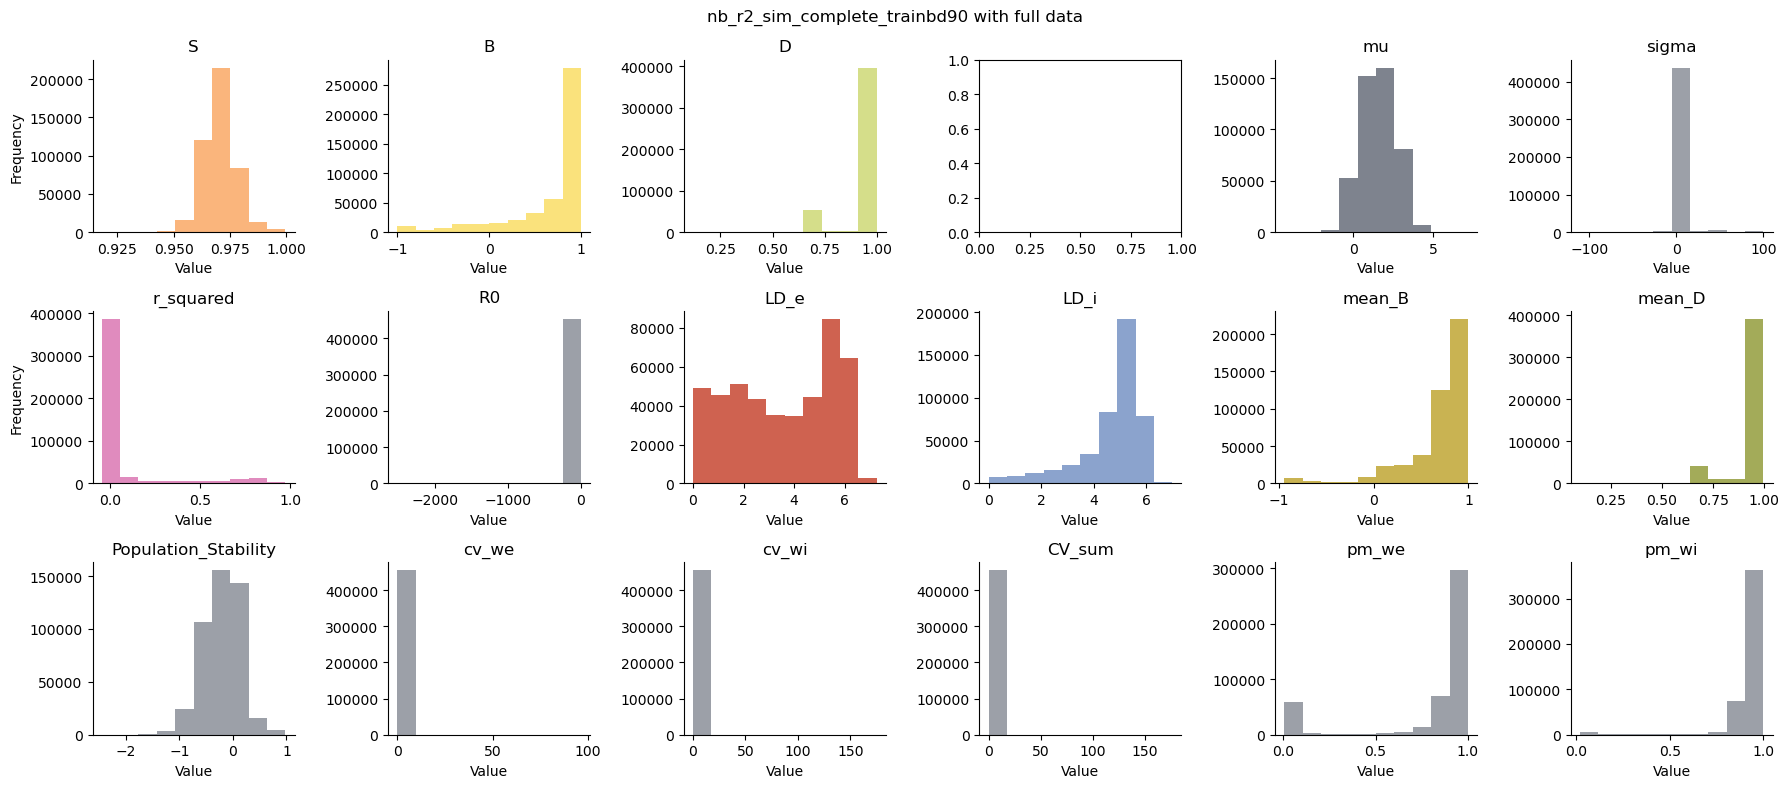

In [4]:
# S, B, D, A, mu, sigma, r_squared, R0, LD_e, LD_i, mean_B, mean_D, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi
metrics = [x_r2_notnan[:,i] for i in range(18)]
metrics_labels = ["S", "B", "D", "A", "mu", "sigma", "r_squared", "R0", "LD_e", "LD_i", "mean_B", "mean_D", "Population_Stability", "cv_we", "cv_wi", "CV_sum", "pm_we", "pm_wi"]
colors = ['#F89644', '#F8D644', '#C4D058', "#727884", "#727884", "#727884", "#D35AA3", "#727884",'#BB1F06', "#5A7CB9", "#B39309", "#7D8813", "#727884", "#727884", "#727884", "#727884", "#727884", "#727884"]
# Create a figure with 7 subplots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 8))

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()
# Plot each metric as a histogram in a different subplot
for i in range(18):
    if i == 3:
        i = 4
    ax = axes[i]
    ax.hist(metrics[i], alpha=0.7, color=colors[i])
    ax.set_title(metrics_labels[i])
    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[6].set_ylabel('Frequency')
plt.suptitle(f'{data_name} with full data')
plt.tight_layout()
plt.show()

In [147]:
x_r2_notnan[x_r2_notnan[:,12] > 0.98]
theta_populationmean_torch = theta_r2_notnan[x_r2_notnan[:,12] > 0.98]
theta_populationmean_torch.shape

torch.Size([4, 8])

In [143]:
x_r2_notnan[x_r2_notnan[:,12] > 0.98]

tensor([[ 9.9958e-01, -9.3886e-01,  9.8850e-01,  3.6564e-07,  5.4701e-01,
          1.4001e+00, -3.0798e-07,  6.9427e-01,  2.1689e-02,  1.1947e-02,
         -6.3706e-01,  9.8645e-01,  9.8085e-01,  1.6825e-02,  2.3199e-03,
          1.9145e-02,  9.9958e-01,  9.9974e-01],
        [ 9.9962e-01, -9.3392e-01,  9.9063e-01,  4.2699e-02,  3.5088e+00,
          2.9929e-02,  2.9705e-03,  6.6513e-01,  2.7150e-02,  1.4713e-02,
         -6.0864e-01,  9.8781e-01,  9.8249e-01,  1.5040e-02,  2.4680e-03,
          1.7508e-02,  9.9964e-01,  9.9991e-01],
        [ 9.9959e-01,  9.2802e-01,  9.9325e-01,  1.1204e-01,  9.5101e-01,
         -1.8800e-02,  7.7054e-03,  6.4426e-01,  5.3287e-02,  1.6542e-02,
          2.0988e-01,  9.8796e-01,  9.8111e-01,  1.5626e-02,  3.2617e-03,
          1.8888e-02,  9.9860e-01,  9.9969e-01],
        [ 9.9958e-01, -4.9316e-01,  9.9239e-01,  1.0021e-01,  2.0333e+00,
          2.0583e+00,  4.7793e-03,  5.3822e-01,  3.4508e-02,  1.4568e-02,
          1.9761e-01,  9.8678e-01,  9.8

In [113]:
x_r2_notnan[x_r2_notnan[:,8] < 0.1].shape

torch.Size([6173, 18])

In [114]:
x_r2_notnan[x_r2_notnan[:,8] < 0.1][:8]

tensor([[ 9.7792e-01,  9.6441e-01,  9.8996e-01,  4.3251e-05,  1.9063e+00,
          2.3225e+00, -1.6401e-08,  3.0154e-01,  9.1142e-02,  5.5091e+00,
          9.1331e-01,  9.8577e-01,  2.5807e-01,  2.0488e-02,  7.2194e-01,
          7.4242e-01,  9.9922e-01,  9.5669e-01],
        [ 9.7892e-01, -5.4163e-02,  9.8236e-01,  1.3962e-01,  2.6378e+00,
          1.0040e+00,  1.6052e-02,  2.0288e-01,  8.0523e-02,  5.2080e+00,
         -3.4826e-01,  9.8607e-01,  2.9165e-01,  2.0291e-02,  6.9055e-01,
          7.1084e-01,  9.9842e-01,  9.1109e-01],
        [ 9.7688e-01, -9.8868e-01,  9.9463e-01,  9.5712e-02,  2.7070e+00,
          6.2348e-01,  1.8717e-02,  1.7638e-01,  8.0901e-02,  5.8388e+00,
         -5.8316e-01,  9.8810e-01,  2.2289e-01,  2.1359e-02,  7.6025e-01,
          7.8160e-01,  9.9637e-01,  9.0088e-01],
        [ 9.7653e-01,  9.8468e-01,  9.8659e-01,  8.9869e-02, -6.6946e-03,
         -1.3323e-01,  7.8648e-03,  2.6733e-01,  8.2638e-02,  5.7183e+00,
          8.4603e-01,  9.8680e-01,  2.1

(array([ 54.,  96., 122., 106., 109., 126., 154., 139., 138., 177., 198.,
        195., 195., 222., 218., 249., 257., 269., 252., 280., 269., 350.,
        296., 392., 354., 375., 445., 457., 469., 476.]),
 array([0.01750785, 0.03358939, 0.04967093, 0.06575246, 0.081834  ,
        0.09791554, 0.11399707, 0.13007861, 0.14616016, 0.16224168,
        0.17832322, 0.19440475, 0.21048629, 0.22656783, 0.24264936,
        0.25873092, 0.27481243, 0.29089397, 0.30697551, 0.32305706,
        0.3391386 , 0.35522014, 0.37130165, 0.38738319, 0.40346473,
        0.41954628, 0.43562782, 0.45170936, 0.46779087, 0.48387241,
        0.49995396]),
 <BarContainer object of 30 artists>)

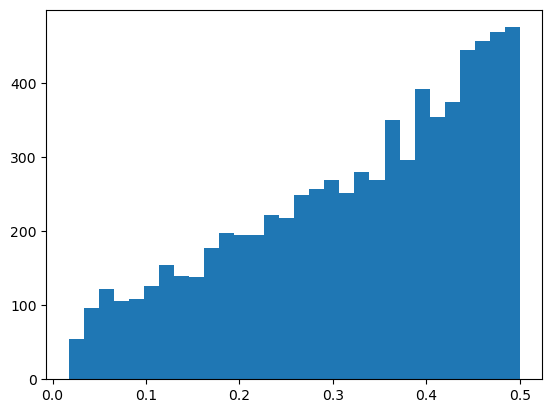

In [126]:
plt.hist(x_r2_notnan[x_r2_notnan[:,15] < 0.5][:,15], bins=30)

(array([ 110.,   47.,   55.,   54.,   43.,   36.,   32.,   26.,   18.,
          21.,   37.,   18.,   21.,   26.,   17.,   26.,   21.,   41.,
          62.,  116.,  225.,  432.,  800., 1213., 1248.,  884.,  385.,
         131.,   24.,    4.]),
 array([3.20982838e-17, 2.27150902e-01, 4.54301804e-01, 6.81452692e-01,
        9.08603609e-01, 1.13575447e+00, 1.36290538e+00, 1.59005630e+00,
        1.81720722e+00, 2.04435802e+00, 2.27150893e+00, 2.49865985e+00,
        2.72581077e+00, 2.95296168e+00, 3.18011260e+00, 3.40726352e+00,
        3.63441443e+00, 3.86156535e+00, 4.08871603e+00, 4.31586695e+00,
        4.54301786e+00, 4.77016878e+00, 4.99731970e+00, 5.22447062e+00,
        5.45162153e+00, 5.67877245e+00, 5.90592337e+00, 6.13307428e+00,
        6.36022520e+00, 6.58737612e+00, 6.81452703e+00]),
 <BarContainer object of 30 artists>)

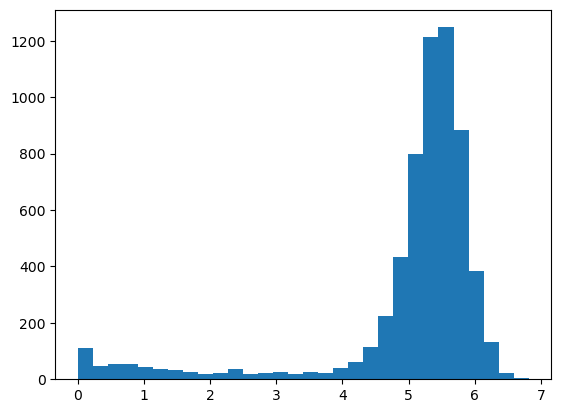

In [ ]:
plt.hist(x_r2_notnan[x_r2_notnan[:,] < 0.1][:,9], bins=30)

In [162]:
theta_populationmean =theta_populationmean_torch.cpu().detach().numpy()[2]
print(theta_populationmean)

[ 1.323821   -0.01703208 -0.609152    0.11269434 -1.6336392   0.04401907
 -0.3134368   0.14664261]


In [165]:
w_e, w_i, r, E_target, E_rates, I_rates, angle, S, B, D,  A, mu, sigma, r_squared, R0, mean_B, mean_D, LD_e, LD_i, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi = run_baseline_network(theta_populationmean, sbi_run=False)


In [166]:
print("S: ", S, "B: ", B, "D: ", D)
#print("S:",S, "mean_B:", mean_B, "mean_ D:", mean_D)
print("A: ", A, "mu: ", mu, "sigma: ", sigma, "r_squared: ", r_squared, "R0: ", R0)
print("LD_e: ", LD_e, "LD_i: ", LD_i,"mean_B", mean_B, "mean_ D", mean_D )
print("Population_Stability: ", Population_Stability, "cv_we: ", cv_we, "cv_wi: ", cv_wi, "CV_sum: ", CV_sum)
print("pm_we: ", pm_we, "pm_wi: ", pm_wi)

S:  0.9996648590792075 B:  0.986484415985585 D:  0.9921454008233062
A:  43.952055255791755 mu:  1.337697864773245 sigma:  45.887572995860594 r_squared:  0.009351048132851703 R0:  -43.177676390278094
LD_e:  0.020497420713753423 LD_i:  0.03366034105297366 mean_B 0.8011373728776383 mean_ D 0.986272408160185
Population_Stability:  0.985889778013745 cv_we:  0.008573829852604126 cv_wi:  0.005535907630292971 CV_sum:  0.014109737482897098
pm_we:  0.9990293996663213 pm_wi:  0.9993435830133935


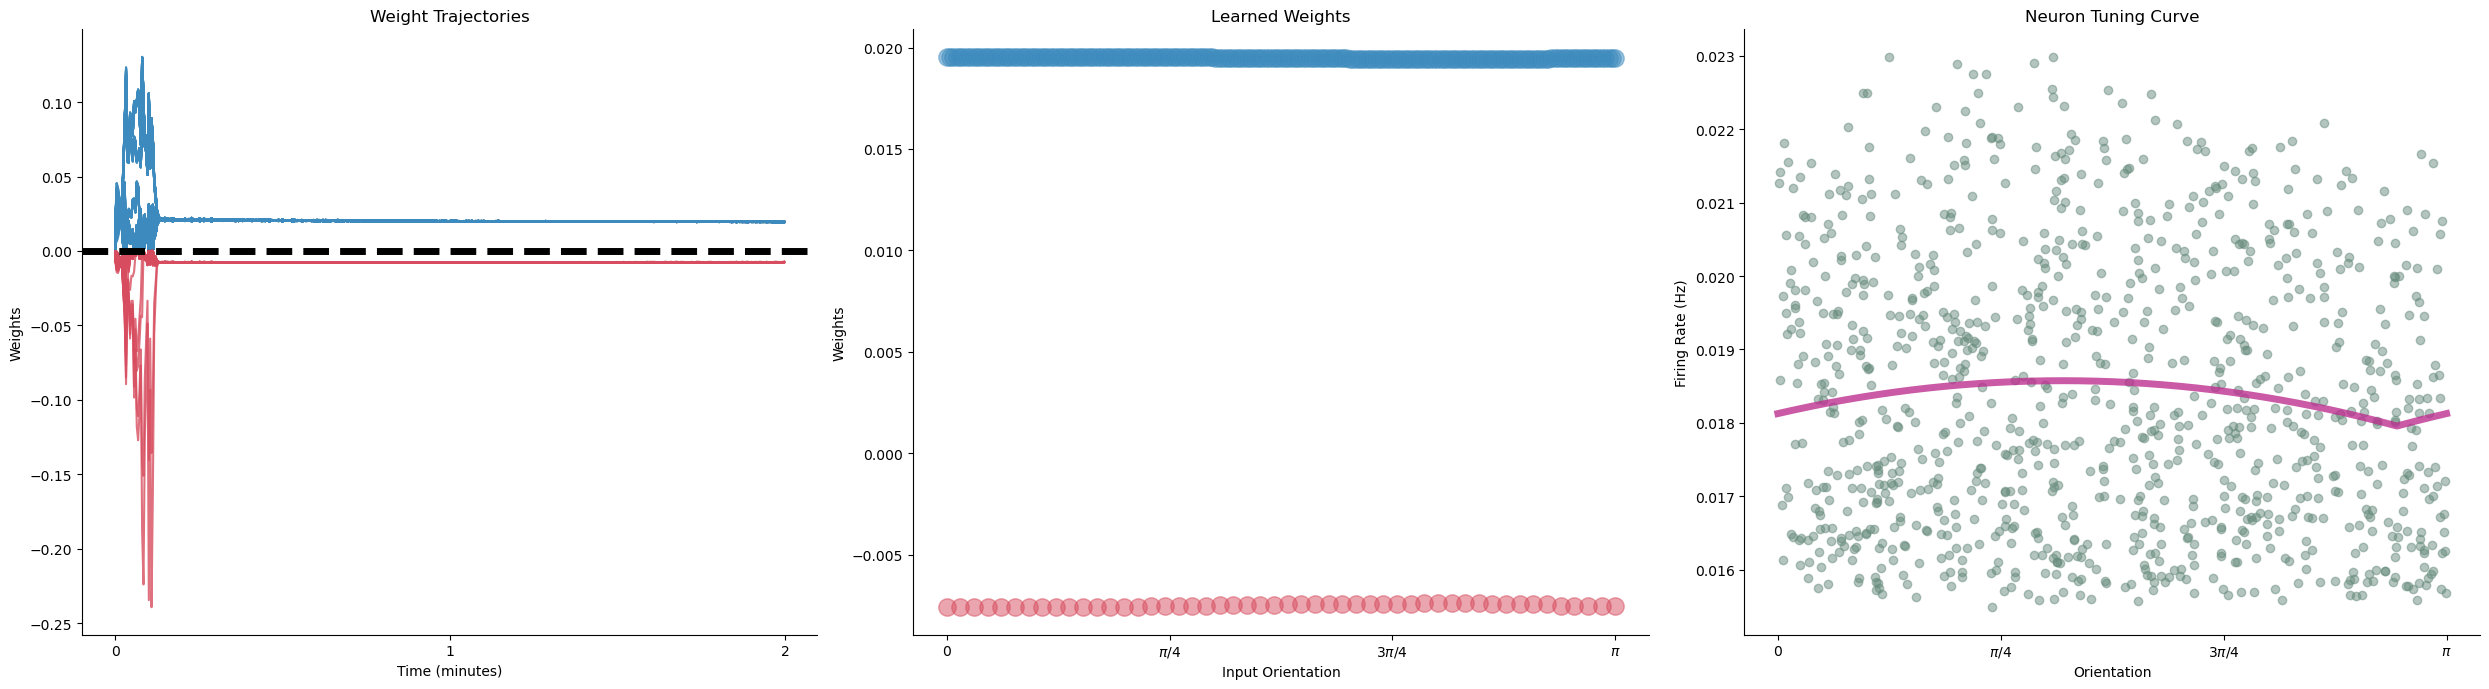

In [167]:
samples_plot(w_e, w_i, r, angle)

In [168]:
w_i

array([[0.02446529, 0.00059039, 0.00316608, ..., 0.02809798, 0.009103  ,
        0.02994593],
       [0.00655677, 0.00715019, 0.02273787, ..., 0.00498033, 0.01780873,
        0.01467929],
       [0.01271008, 0.01385513, 0.04392111, ..., 0.00966783, 0.03441188,
        0.02837584],
       ...,
       [0.03024212, 0.03024142, 0.03023973, ..., 0.03003389, 0.03003348,
        0.03003637],
       [0.03024212, 0.03024131, 0.03023967, ..., 0.03003365, 0.03003327,
        0.03003605],
       [0.030242  , 0.0302413 , 0.03023957, ..., 0.03003333, 0.03003307,
        0.03003582]])

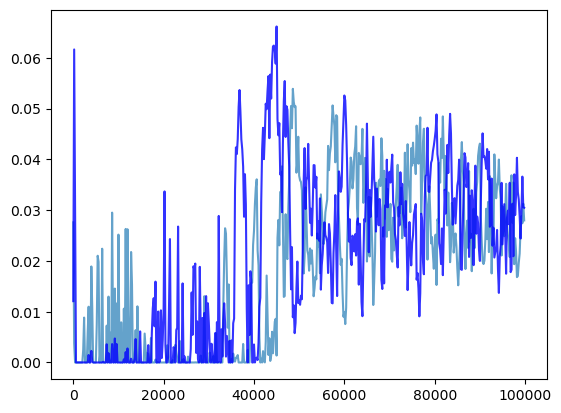

In [131]:
time = 100000 # ms
dt = 0.1  # ms
timesteps=int(time/dt)
pulse_time = 50
plt.plot(np.linspace(0, time, timesteps)[::2000], w_i[::2000][:,0], color = '#3d8bbeff', alpha = 0.8)
plt.plot(np.linspace(0, time, timesteps)[::2000], w_i[::2000][:,20], color = "b", alpha = 0.8)

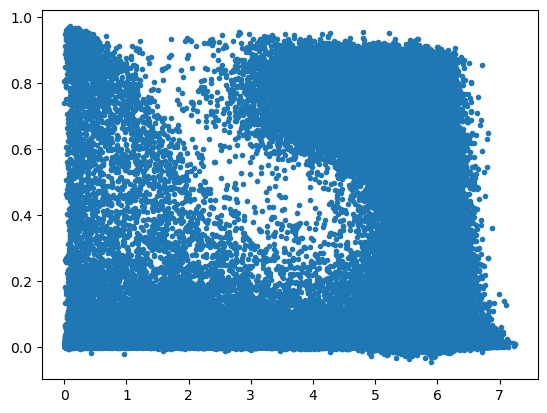

In [19]:
plt.plot(x_r2_notnan[:,8],x_r2_notnan[:,6], ".")

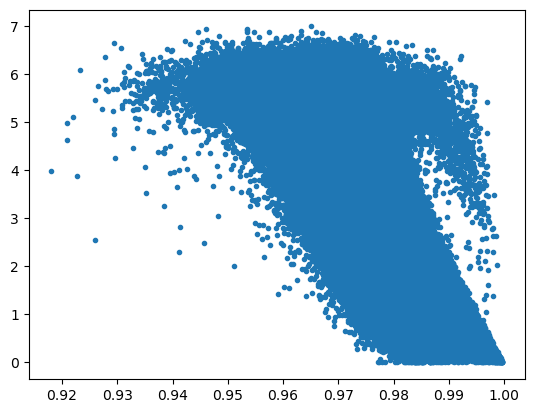

In [15]:
plt.plot(x_r2_notnan[:,0],x_r2_notnan[:,9], ".")

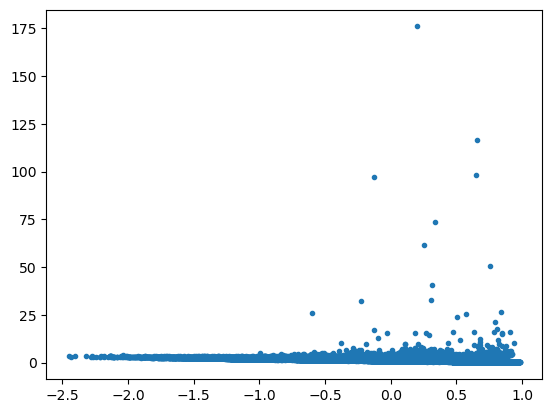

In [214]:
plt.plot(x_r2_notnan[:,12], x_r2_notnan[:,15], ".")

In [215]:
np.corrcoef(x_r2_notnan[:,15],x_r2_notnan[:,12])

array([[ 1.        , -0.52516852],
       [-0.52516852,  1.        ]])

In [171]:
np.corrcoef(x_r2_notnan[:,15],x_r2_notnan[:,8])

array([[1.        , 0.50615263],
       [0.50615263, 1.        ]])

In [119]:
np.corrcoef(x_r2_notnan[:,8], x_r2_notnan[:,9])

array([[ 1.       , -0.1514672],
       [-0.1514672,  1.       ]])

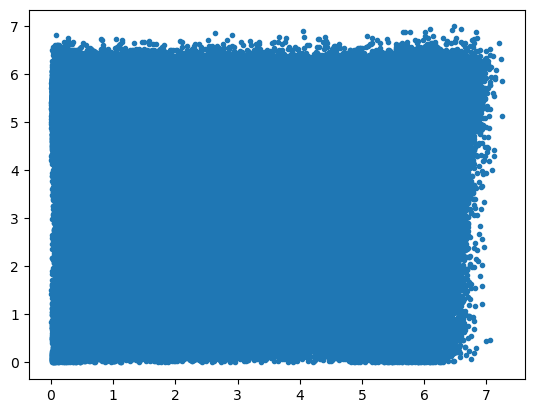

In [120]:
plt.plot(x_r2_notnan[:,8],x_r2_notnan[:,9], ".")

In [134]:
torch.max(x_r2_notnan[:,12])

tensor(0.9825)

In [ ]:
# Example array
population_stability = x_r2_notnan[:,12]

# Calculate the threshold value for the top 10%
num_top = int(np.ceil(0.1 * len(population_stability)))
print(num_top)
# Use np.partition to find the indices of the largest 10% values
threshold_value = np.partition(data, -num_top)[-num_top]  # Find the smallest value in the top 10%
indices_top_10_percent = np.where(data >= threshold_value)[0]

# Extract the largest 10% values using the indices
top_10_percent_values = data[indices_top_10_percent]

print("Indices of top 10% values:", indices_top_10_percent)
print("Top 10% values:", top_10_percent_values)

1
Indices of top 10% values: [4]
Top 10% values: [50]


In [176]:
np.ceil(0.1 * len(data))

1.0

In [178]:
len(data)*0.1

0.8

In [183]:
np.partition(data, -num_top)[-num_top]

50

In [185]:
np.where(data >= threshold_value)[0]

array([4])

In [187]:

population_stability = x_r2_notnan[:,12]
population_stability.shape

torch.Size([454904])

In [225]:
def percent_highervalues(data, percent):
    # Calculate the threshold value for the top 10%
    num_top = int(np.ceil(percent * len(data)))

    # Use np.partition to find the indices of the largest 10% values
    threshold_value = np.partition(data, -num_top)[-num_top]  # Find the smallest value in the top 10%
    indices_top_10_percent = np.where(data >= threshold_value)[0]



    return indices_top_10_percent

In [240]:
def percent_lowervalues(data, percent):

    # Calculate the number of elements to select (smallest 10%)
    num_bottom = int(np.ceil(percent * len(data)))

    # Use np.partition to find the indices of the smallest 10% values
    threshold_value = np.partition(data, num_bottom - 1)[num_bottom - 1]  # Find the largest value in the bottom 10%
    indices_bottom_10_percent = np.where(data <= threshold_value)[0]

    
    return indices_bottom_10_percent

In [230]:
ps_10_index = percent_highervalues(x_r2_notnan[:,12], 0.1)
x_r2_ps_10_index = x_r2_notnan[ps_10_index]

cv_10_index = percent_highervalues(x_r2_ps_10_index[:,15], 0.1)
x_r2_cv_10_index = x_r2_ps_10_index[cv_10_index]
x_r2_cv_10_index.shape

torch.Size([4550, 18])

In [235]:
ld_sum = x_r2_notnan[:,8] + x_r2_notnan[:,9]

In [243]:
ld_10_index = percent_lowervalues(ld_sum[ps_10_index], 0.1)
x_r2_ld_10_index = ld_sum[ps_10_index][ld_10_index]
x_r2_ld_10_index.shape

torch.Size([4550])

(array([154., 279., 312., 336., 436., 476., 535., 639., 603., 780.]),
 array([0.03363661, 0.26335219, 0.49306777, 0.72278339, 0.95249891,
        1.1822145 , 1.41193008, 1.64164567, 1.87136126, 2.10107684,
        2.33079243]),
 <BarContainer object of 10 artists>)

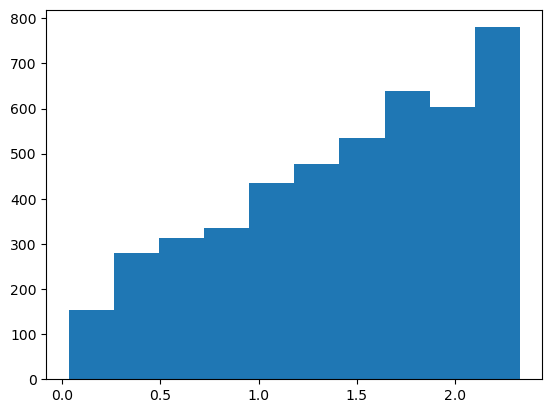

In [242]:
plt.hist(x_r2_ld_10_index)

(array([4.54888e+05, 8.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.75078548e-02, 1.76147766e+01, 3.52120476e+01, 5.28093185e+01,
        7.04065857e+01, 8.80038528e+01, 1.05601128e+02, 1.23198395e+02,
        1.40795670e+02, 1.58392929e+02, 1.75990204e+02]),
 <BarContainer object of 10 artists>)

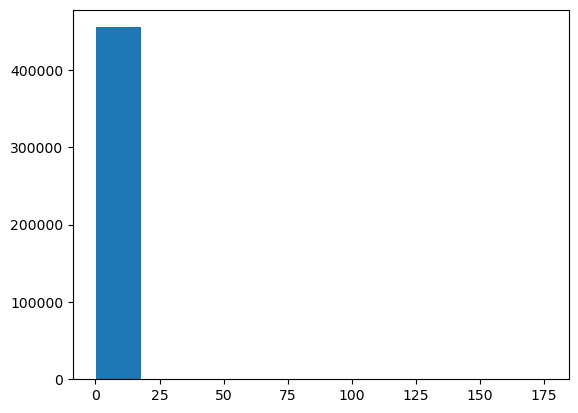

In [233]:
plt.hist(x_r2_notnan[:,15])

In [ ]:

# Example array
population_stability = x_r2_notnan[:,12]

# Calculate the threshold value for the top 10%
num_top = int(np.ceil(0.10 * len(population_stability)))
print(num_top)

threshold_value = np.partition(population_stability, -num_top)[-num_top]  # Find the smallest value in the top 10%
print(threshold_value)
indices_top_10_percent = np.where(population_stability >= threshold_value)[0]

# Extract the largest 10% values using the indices
top_10_percent_values_ps = population_stability[indices_top_10_percent]

45491
0.20662838


In [209]:
top_10_percent_values

tensor([0.2263, 0.2114, 0.2078,  ..., 0.2467, 0.6980, 0.2332])

(array([23055.,  7799.,  3934.,  2867.,  2331.,  1791.,  1405.,  1108.,
          727.,   474.]),
 array([0.20662838, 0.28421476, 0.36180112, 0.4393875 , 0.51697385,
        0.59456027, 0.67214662, 0.74973297, 0.82731932, 0.90490574,
        0.98249209]),
 <BarContainer object of 10 artists>)

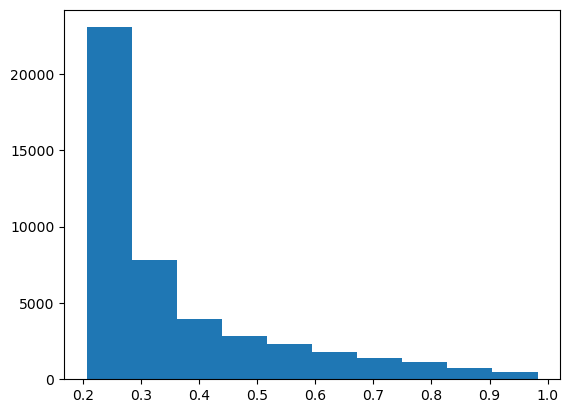

In [ ]:
plt.hist(top_10_percent_values_ps)

In [201]:
population_stability[population_stability > 0.8].shape

torch.Size([454904])

(array([4.5469e+04, 1.2000e+01, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.75078548e-02, 1.16521187e+01, 2.32867298e+01, 3.49213409e+01,
        4.65559502e+01, 5.81905632e+01, 6.98251724e+01, 8.14597855e+01,
        9.30943985e+01, 1.04729004e+02, 1.16363617e+02]),
 <BarContainer object of 10 artists>)

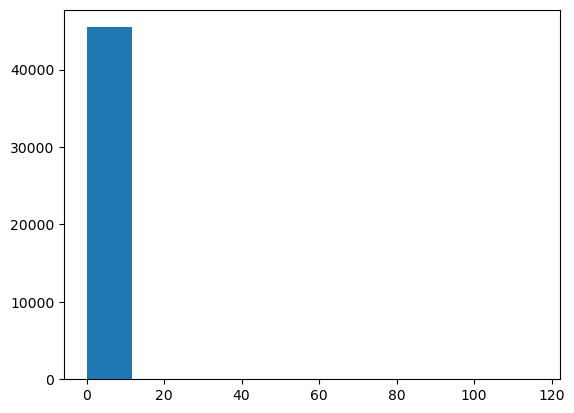

In [211]:
plt.hist(x_r2_notnan[indices_top_10_percent][:,15])

In [ ]:
num_top = int(np.ceil(0.10 * len(population_stability)))


In [213]:
x_r2_notnan[indices_top_10_percent][:,15].shape

torch.Size([45491])

In [218]:
import scipy as scp

In [224]:
scp.stats.pearsonr(x_r2_notnan[:,12], x_r2_notnan[:,0])

PearsonRResult(statistic=0.9434595810764244, pvalue=0.0)

## SAMPLING FROM R2_BD90_PS10PERCENT POSTERIOR

In [3]:
# Load pickle data
with open("saved/results/nb_r2_posterior_complete_trainbd90_ps10higher.pkl", "rb") as file:
    posterior_r2 = pickle.load(file)

print("Posterior round2 loaded", posterior_r2)

Posterior round2 loaded Posterior p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

[-1.8939713   0.01515853  1.2935524   0.10824547 -1.9117191   0.015955
 -1.9534248   0.18720885]
S:  0.9989886129581017 B:  0.9994090003069058 D:  0.9927736096390631
A:  -2.0910794722798428e-08 mu:  1.2840011613495448 sigma:  0.3503070362299262 r_squared:  -2.1150070130593335e-05 R0:  0.6757421040335482
LD_e:  0.11296073179509374 LD_i:  0.11612749565111234 mean_B 0.9044445812869962 mean_ D 0.9852036315261075
Population_Stability:  0.9589135956907358 cv_we:  0.02342742163068866 cv_wi:  0.01765837688496425 CV_sum:  0.041085798515652916
pm_we:  0.998566916584507 pm_wi:  0.9983255569111464


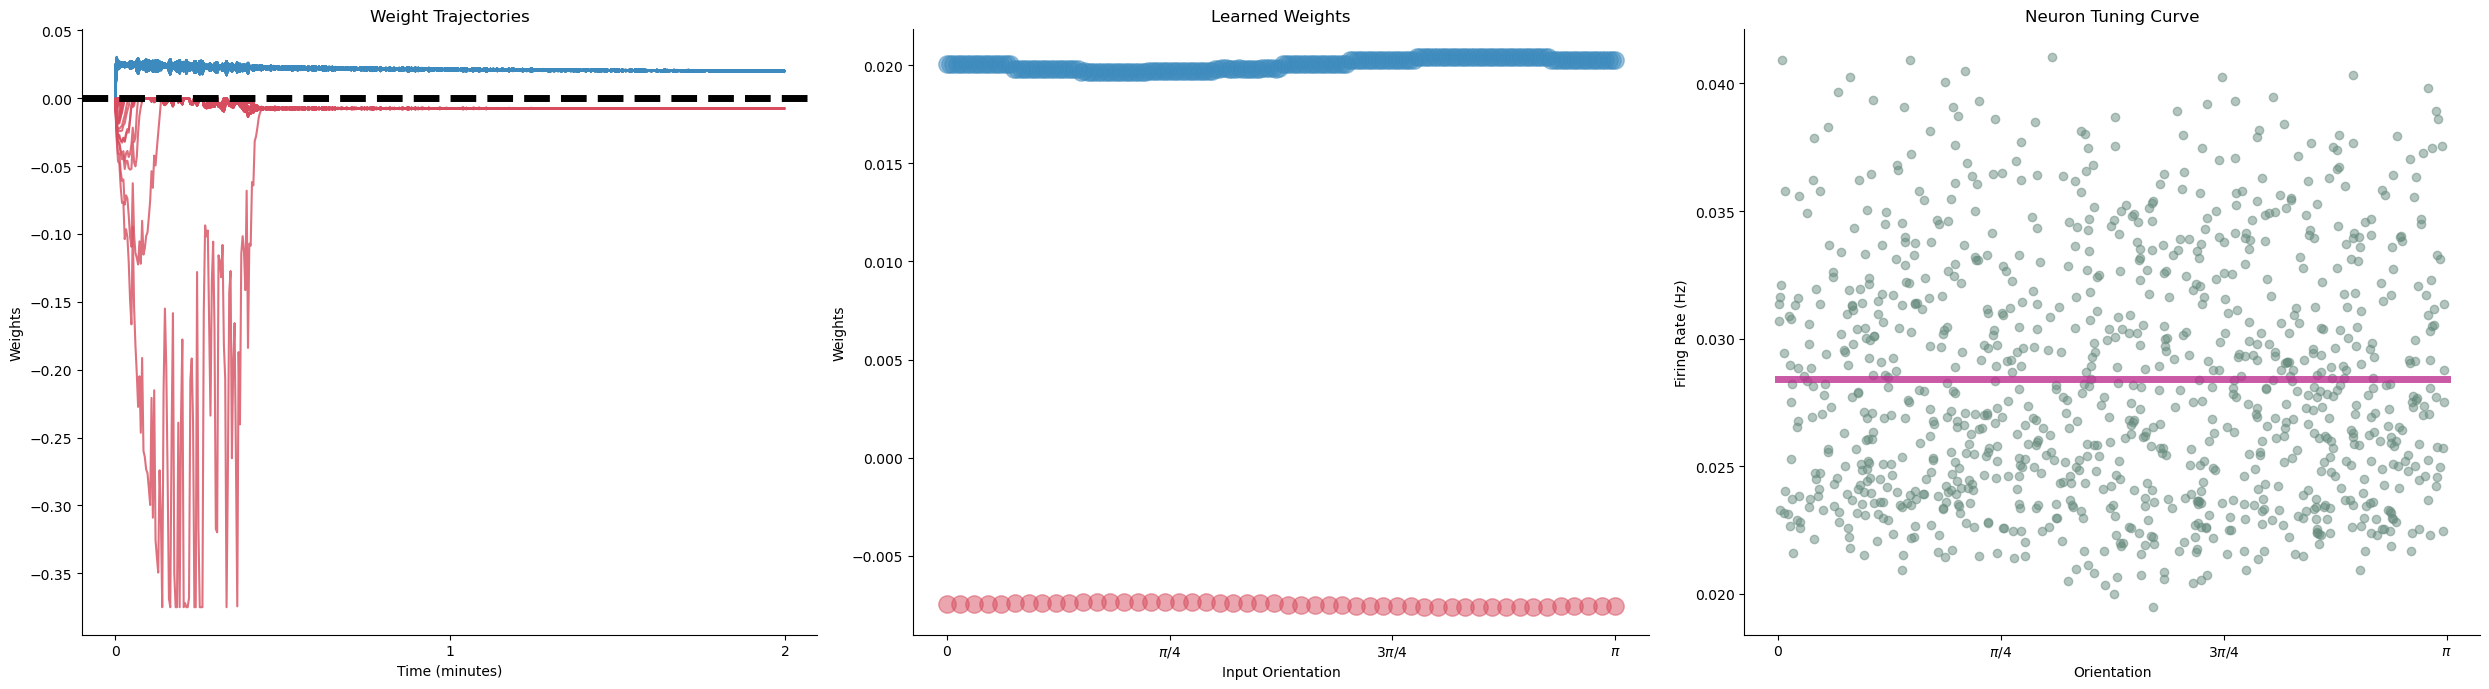

In [7]:
# observation of S = 0 and B = 0
observation = torch.zeros(1, ) + 1
#observation = torch.tensor([0.9, 0.9, 0.9])
samples_torch = posterior_r2.sample((1,), x=observation)
samples = samples_torch.cpu().detach().numpy()[0]
print(samples)

w_e, w_i, r, E_target, E_rates, I_rates, angle, S, B, D,  A, mu, sigma, r_squared, R0, mean_B, mean_D, LD_e, LD_i, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi = run_baseline_network(samples, sbi_run=False)

print("S: ", S, "B: ", B, "D: ", D)
#print("S:",S, "mean_B:", mean_B, "mean_ D:", mean_D)
print("A: ", A, "mu: ", mu, "sigma: ", sigma, "r_squared: ", r_squared, "R0: ", R0)
print("LD_e: ", LD_e, "LD_i: ", LD_i,"mean_B", mean_B, "mean_ D", mean_D )
print("Population_Stability: ", Population_Stability, "cv_we: ", cv_we, "cv_wi: ", cv_wi, "CV_sum: ", CV_sum)
print("pm_we: ", pm_we, "pm_wi: ", pm_wi)

samples_plot(w_e, w_i, r, angle)


In [258]:
ps_10_index = percent_highervalues(x_r2_notnan[:,12], 0.1)
x_filtered = x_r2_notnan[ps_10_index][:,12]
theta_filtered = theta_r2_notnan[ps_10_index]

In [259]:
theta_filtered.shape

torch.Size([45491, 8])

In [260]:
x_filtered.shape

torch.Size([45491])

## SEE DATA R3 nb_r3_data_complete_trainbd90_popstb10perc

In [3]:
data_name = "nb_r3_data_complete_trainbd90_popstb10perc"
data_r3 = np.load(f'saved/sim/{data_name}.npz')

theta_r3 = torch.from_numpy(data_r3['theta'])
x_r3 = torch.from_numpy(data_r3['x'])
print("Data round1 loaded", theta_r3.shape, x_r3.shape)
mask_notnan = torch.isfinite(x_r3).all(dim=1)
# Select only rows without `inf` values
x_r3_notnan = x_r3[mask_notnan]
theta_r3_notnan = theta_r3[mask_notnan]

Data round1 loaded torch.Size([350000, 8]) torch.Size([350000, 18])


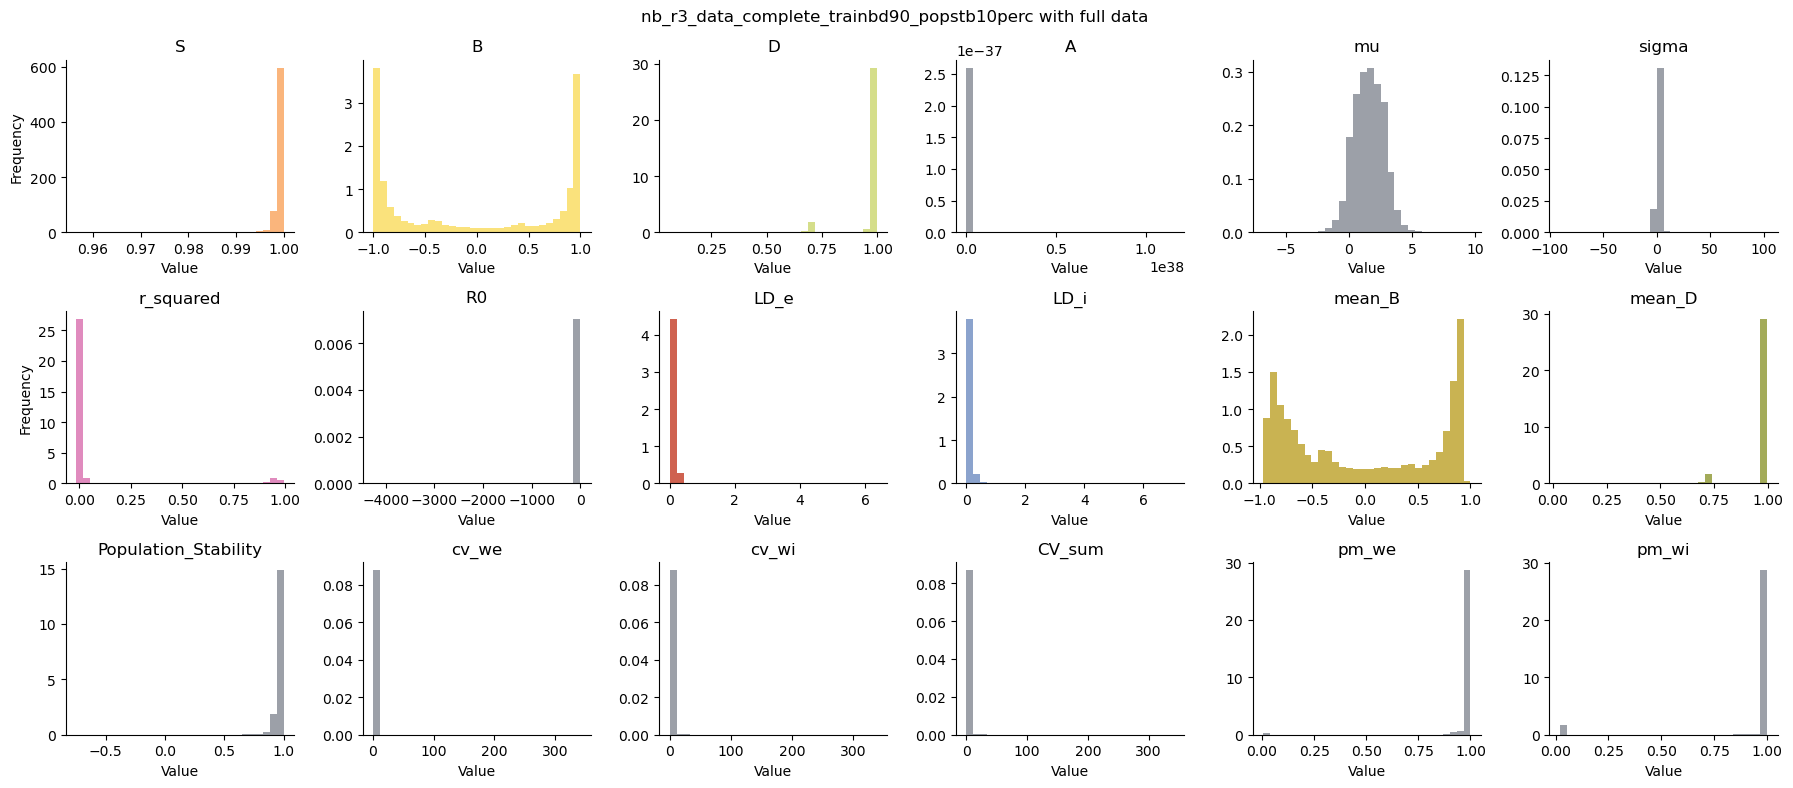

In [4]:
# S, B, D, A, mu, sigma, r_squared, R0, LD_e, LD_i, mean_B, mean_D, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi
metrics = [x_r3_notnan[:,i] for i in range(18)]
metrics_labels = ["S", "B", "D", "A", "mu", "sigma", "r_squared", "R0", "LD_e", "LD_i", "mean_B", "mean_D", "Population_Stability", "cv_we", "cv_wi", "CV_sum", "pm_we", "pm_wi"]
colors = ['#F89644', '#F8D644', '#C4D058', "#727884", "#727884", "#727884", "#D35AA3", "#727884",'#BB1F06', "#5A7CB9", "#B39309", "#7D8813", "#727884", "#727884", "#727884", "#727884", "#727884", "#727884"]
# Create a figure with 7 subplots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 8))

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()
# Plot each metric as a histogram in a different subplot
for i in range(18):
    ax = axes[i]
    ax.hist(metrics[i], bins=30, alpha=0.7, color=colors[i], density=True)
    ax.set_title(metrics_labels[i])
    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[6].set_ylabel('Frequency')
plt.suptitle(f'{data_name} with full data')
plt.tight_layout()
plt.show()

In [9]:
def percent_highervalues(data, percent):
    # Calculate the threshold value for the top 10%
    num_top = int(np.ceil(percent * len(data)))

    # Use np.partition to find the indices of the largest 10% values
    threshold_value = np.partition(data, -num_top)[-num_top]  # Find the smallest value in the top 10%
    indices_top_10_percent = np.where(data >= threshold_value)[0]


    print(threshold_value)
    return indices_top_10_percent

In [8]:
x_r3_notnan[x_r3_notnan[:,6] > 0.75].shape

torch.Size([21906, 18])

In [10]:
rsqrt_indx = percent_highervalues(x_r3_notnan[:,6], 0.1)



0.018195305


## SAMPLING FRO R3 POSTERIOR

In [2]:
# Load pickle data
with open("saved/results/nb_r3_posterior_complete_trainbd90_ps10higher_rsqrt.pkl", "rb") as file:
    posterior_r3 = pickle.load(file)

print("Posterior round2 loaded", posterior_r3)

Posterior round2 loaded Posterior p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

[-1.9647506   0.15150416 -0.11040011  0.08089336  0.44543055  0.09890458
  0.2036127  -0.06208223]
S:  0.9889756133509923 B:  0.4323681038970979 D:  0.7109208043080466
A:  0.7509121239676956 mu:  0.21648304397953422 sigma:  0.45487477555508765 r_squared:  0.9568412424884507 R0:  -0.0069475162725459744
LD_e:  0.2528043220983677 LD_i:  4.383576428940677 mean_B 0.528651746608376 mean_ D 0.6217001263252548
Population_Stability:  0.6145023725334864 cv_we:  0.05375215921122576 cv_wi:  4.706604455639459 CV_sum:  4.760356614850685
pm_we:  0.89041722242793 pm_wi:  0.030138950049776635


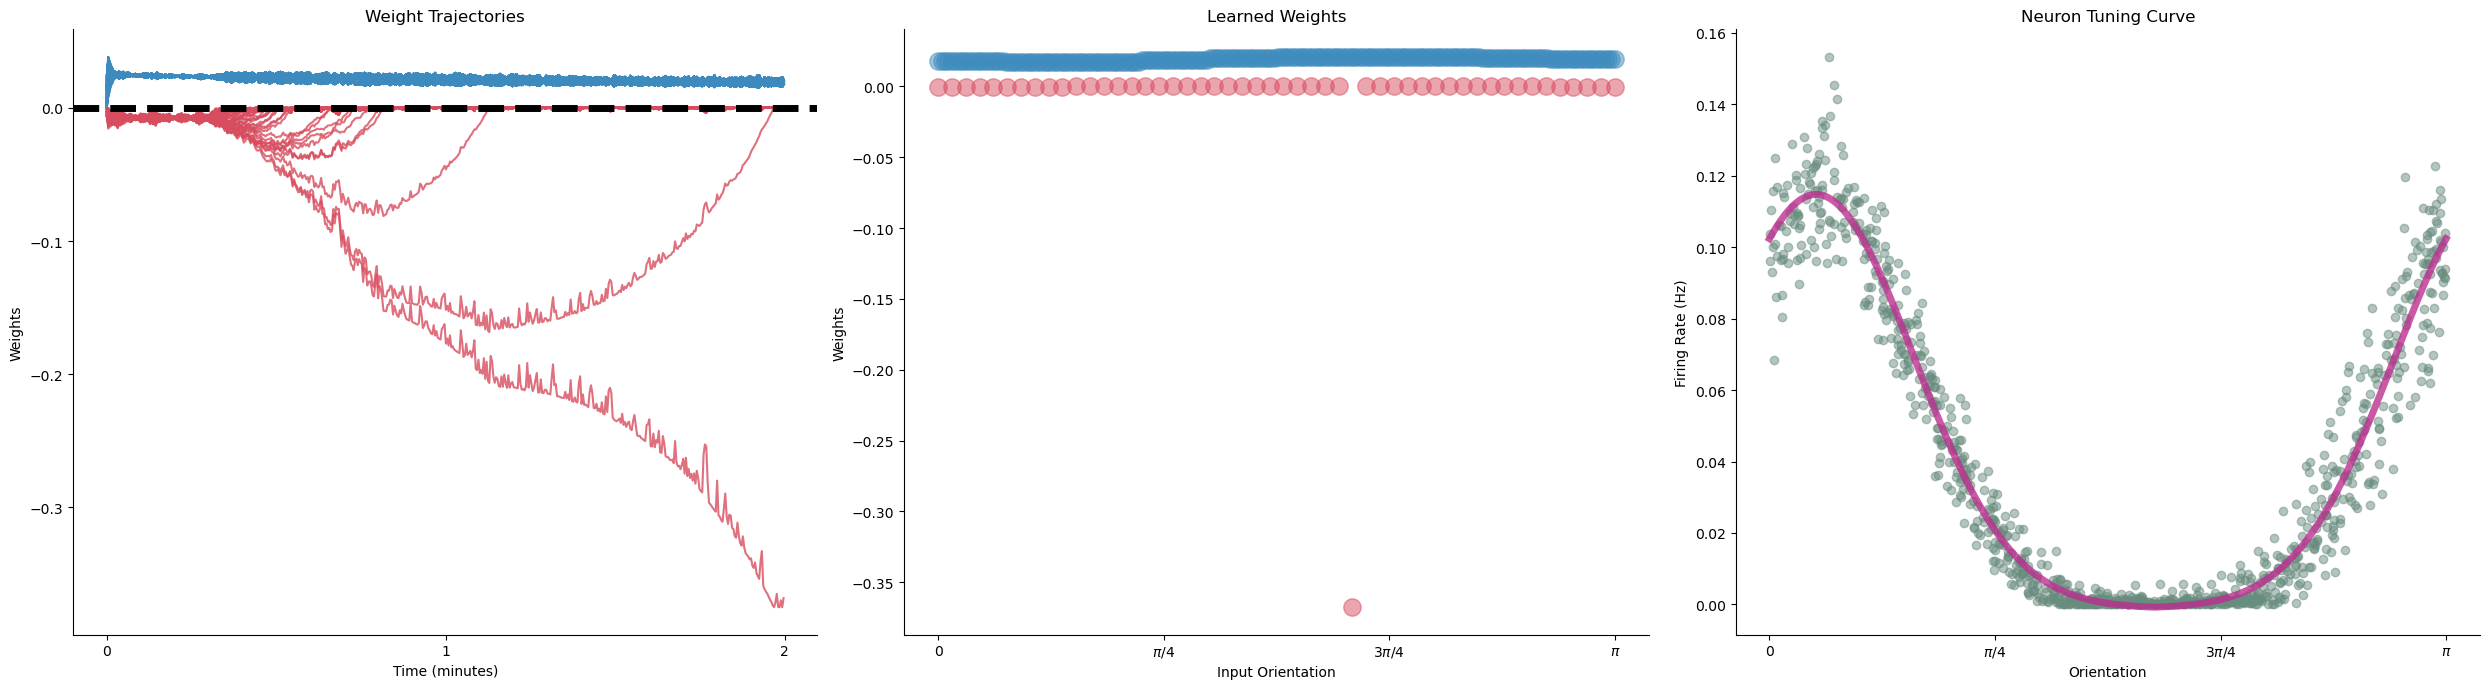

In [18]:
# SAMPLING FROM R3 POSTERIOR

# observation of S = 0 and B = 0
observation = torch.zeros(1, ) + 0.8
#observation = torch.tensor([0.9, 0.9, 0.9])
samples_torch = posterior_r3.sample((1,), x=observation)
samples = samples_torch.cpu().detach().numpy()[0]
print(samples)

w_e, w_i, r, E_target, E_rates, I_rates, angle, S, B, D,  A, mu, sigma, r_squared, R0, mean_B, mean_D, LD_e, LD_i, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi = run_baseline_network(samples, sbi_run=False)

print("S: ", S, "B: ", B, "D: ", D)
#print("S:",S, "mean_B:", mean_B, "mean_ D:", mean_D)
print("A: ", A, "mu: ", mu, "sigma: ", sigma, "r_squared: ", r_squared, "R0: ", R0)
print("LD_e: ", LD_e, "LD_i: ", LD_i,"mean_B", mean_B, "mean_ D", mean_D )
print("Population_Stability: ", Population_Stability, "cv_we: ", cv_we, "cv_wi: ", cv_wi, "CV_sum: ", CV_sum)
print("pm_we: ", pm_we, "pm_wi: ", pm_wi)

samples_plot(w_e, w_i, r, angle)

In [ ]:
def simulator_neuron(parameters):
    p = parameters.cpu().detach().numpy()
    (S, B, D, A, mu, sigma, r_squared, R0, LD_e, LD_i, mean_B, mean_D, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi) = run_baseline_network(p)
    return (S, B, D, A, mu, sigma, r_squared, R0, LD_e, LD_i, mean_B, mean_D, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi)

num_simulations_per_job = 10
observations = 0.75 + 0.25 * torch.rand(num_simulations_per_job)

post_thetas = []
for sim in num_simulations_per_job:
        
    # Proposal - the samples from the posterior become the new prior (pi_2)
    prior_4 =  posterior_r3.set_default_x(observation[sim])



    ## SIMULATE DATA
    theta_4, x_4 = simulate_for_sbi(simulator_neuron,
                                proposal= prior_4,
                                num_simulations=num_simulations_per_job,
                                num_workers=10,
                                show_progress_bar=True)
    post_thetas.append(theta_4)
    post_thetas = torch.cat(post_thetas, 0)

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

/home/wu/wkn661/.conda/envs/sbi_env/lib/python3.10/site-packages/nflows/transforms/lu.py:80: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:2190.)
  outputs, _ = torch.triangular_solve(


  0%|          | 0/1 [00:00<?, ?it/s]

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

## PLOT fixed_exc_r1_sim

In [7]:
data_name = "fixed_exc_r1_sim"
data_r4 = np.load(f'saved/sim/{data_name}.npz')

theta_r4 = torch.from_numpy(data_r4['theta'])
x_r4 = torch.from_numpy(data_r4['x'])
print("Data round1 loaded", theta_r4.shape, x_r4.shape)
mask_notnan = torch.isfinite(x_r4).all(dim=1)
# Select only rows without `inf` values
x_r4_notnan = x_r4[mask_notnan]
theta_r4_notnan = theta_r4[mask_notnan]

Data round1 loaded torch.Size([350000, 4]) torch.Size([350000, 18])


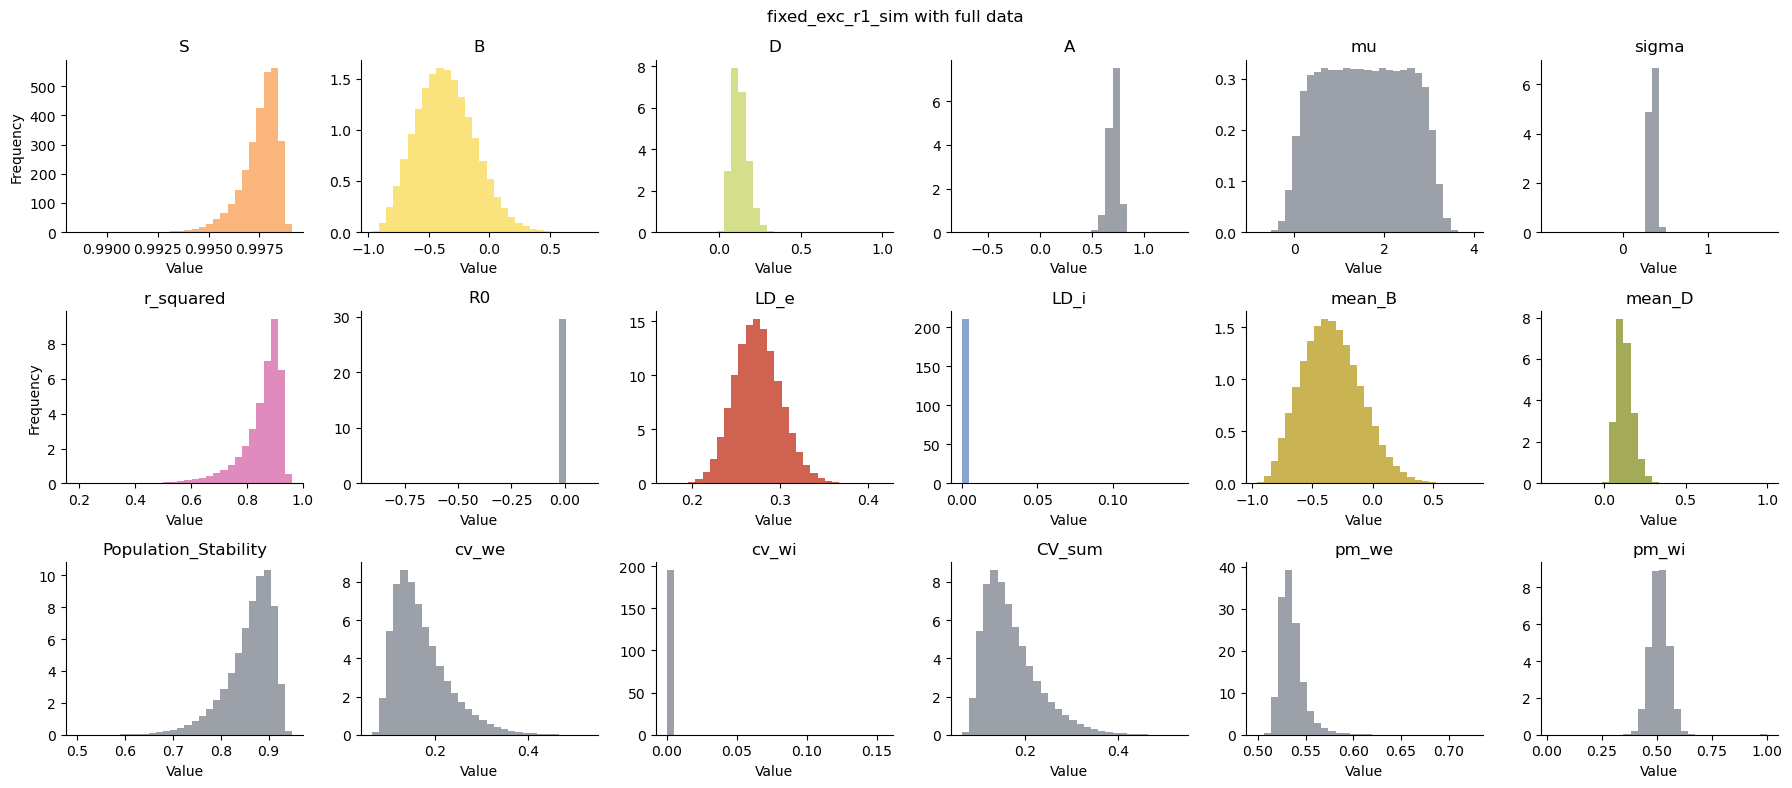

In [8]:
# S, B, D, A, mu, sigma, r_squared, R0, LD_e, LD_i, mean_B, mean_D, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi
metrics = [x_r4_notnan[:,i] for i in range(18)]
metrics_labels = ["S", "B", "D", "A", "mu", "sigma", "r_squared", "R0", "LD_e", "LD_i", "mean_B", "mean_D", "Population_Stability", "cv_we", "cv_wi", "CV_sum", "pm_we", "pm_wi"]
colors = ['#F89644', '#F8D644', '#C4D058', "#727884", "#727884", "#727884", "#D35AA3", "#727884",'#BB1F06', "#5A7CB9", "#B39309", "#7D8813", "#727884", "#727884", "#727884", "#727884", "#727884", "#727884"]
# Create a figure with 7 subplots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 8))

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()
# Plot each metric as a histogram in a different subplot
for i in range(18):
    ax = axes[i]
    ax.hist(metrics[i], bins=30, alpha=0.7, color=colors[i], density=True)
    ax.set_title(metrics_labels[i])
    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[6].set_ylabel('Frequency')
plt.suptitle(f'{data_name} with full data')
plt.tight_layout()
plt.show()


In [9]:
x_rsqrt_filtered = x_r4[x_r4[:,6] >= 0.9]
x_rsqrt_filtered[:,6].unsqueeze(1).shape

torch.Size([87326, 1])

## PLOT P1_r2_data_complete_trainsqrt90


In [2]:
data_name = "P1_r2_data_complete_trainsqrt90"
data_P1_r2 = np.load(f'saved/sim/{data_name}.npz')

theta_P1_r2 = torch.from_numpy(data_P1_r2['theta'])
x_P1_r2 = torch.from_numpy(data_P1_r2['x'])
print("Data round1 loaded", theta_P1_r2.shape, x_P1_r2.shape)
mask_notnan = torch.isfinite(x_P1_r2).all(dim=1)
# Select only rows without `inf` values
x_P1_r2_notnan = x_P1_r2[mask_notnan]
theta_P1_r2_notnan = theta_P1_r2[mask_notnan]

Data round1 loaded torch.Size([350000, 8]) torch.Size([350000, 18])


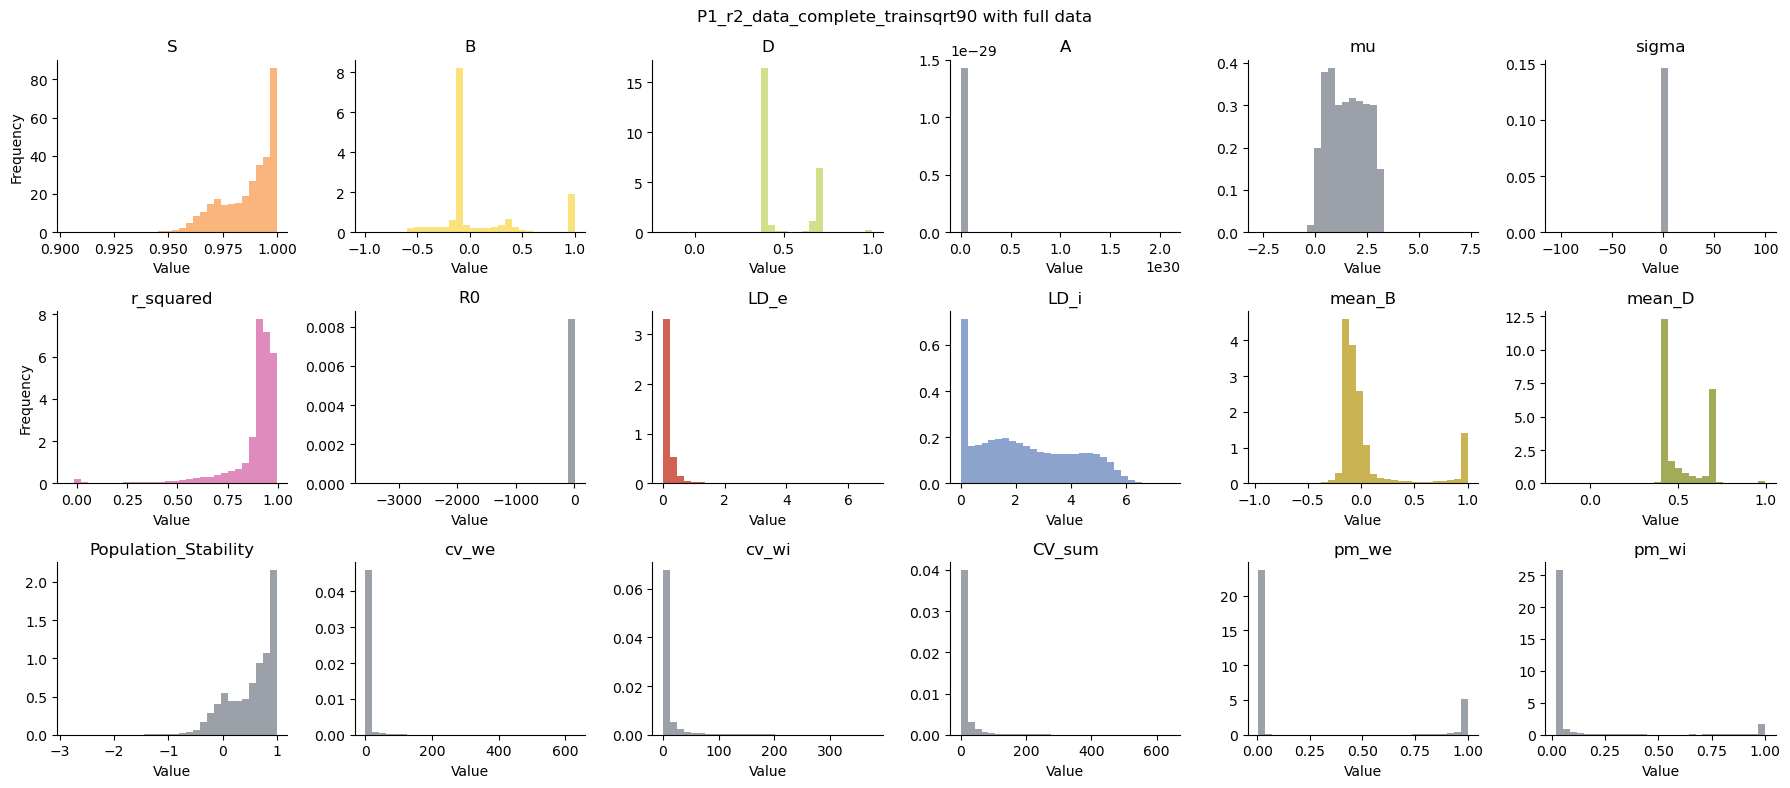

In [4]:
# S, B, D, A, mu, sigma, r_squared, R0, LD_e, LD_i, mean_B, mean_D, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi
metrics = [x_P1_r2[:,i] for i in range(18)]
metrics_labels = ["S", "B", "D", "A", "mu", "sigma", "r_squared", "R0", "LD_e", "LD_i", "mean_B", "mean_D", "Population_Stability", "cv_we", "cv_wi", "CV_sum", "pm_we", "pm_wi"]
colors = ['#F89644', '#F8D644', '#C4D058', "#727884", "#727884", "#727884", "#D35AA3", "#727884",'#BB1F06', "#5A7CB9", "#B39309", "#7D8813", "#727884", "#727884", "#727884", "#727884", "#727884", "#727884"]
# Create a figure with 7 subplots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 8))

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()
# Plot each metric as a histogram in a different subplot
for i in range(18):
    ax = axes[i]
    ax.hist(metrics[i], bins=30, alpha=0.7, color=colors[i], density=True)
    ax.set_title(metrics_labels[i])
    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[6].set_ylabel('Frequency')
plt.suptitle(f'{data_name} with full data')
plt.tight_layout()
plt.show()


In [23]:
popstability_mask = x_P1_r2[:,12] > 0.9
balance_mask = x_P1_r2[:,1] > 0.75
diversity_mask = x_P1_r2[:,2] > 0.75

combined_mask = popstability_mask & balance_mask & diversity_mask

print(x_P1_r2[popstability_mask].shape)
print(x_P1_r2[balance_mask].shape)
print(x_P1_r2[diversity_mask.shape])

torch.Size([80462, 18])
torch.Size([45026, 18])


IndexError: index 350000 is out of bounds for dimension 0 with size 350000

In [7]:
popstability_mask

tensor([[ 9.9973e-01,  1.0000e+00,  4.0529e-01,  ...,  3.1620e+02,
          5.0000e-03,  2.0004e-02],
        [ 9.9855e-01, -1.7727e-01,  7.0901e-01,  ...,  7.3671e-02,
          9.9222e-01,  2.0000e-02],
        [ 9.9918e-01, -5.2379e-01,  7.0968e-01,  ...,  7.2412e+01,
          9.9274e-01,  2.0000e-02],
        ...,
        [ 9.9849e-01,  3.8294e-01,  7.0907e-01,  ...,  7.6515e-02,
          9.9321e-01,  2.0000e-02],
        [ 9.9904e-01, -4.0401e-01,  7.0916e-01,  ...,  4.9717e-02,
          9.9467e-01,  2.0000e-02],
        [ 9.9886e-01,  3.8479e-01,  7.0928e-01,  ...,  5.9397e-02,
          9.9768e-01,  2.0000e-02]])

In [22]:
x_filtered = x_P1_r2[combined_mask]

x_filtered.shape

torch.Size([140, 18])

In [18]:
x_filtered.shape

torch.Size([932, 18])

## PLOT P2_r2_data_complete_popsbd90

In [4]:
data_name = "P2_r2_data_complete_popsbd90"
data_P2_r2 = np.load(f'saved/sim/{data_name}.npz')

theta_P2_r2 = torch.from_numpy(data_P2_r2['theta'])
x_P2_r2 = torch.from_numpy(data_P2_r2['x'])
print("Data round1 loaded", theta_P2_r2.shape, x_P2_r2.shape)
mask_notnan = torch.isfinite(x_P2_r2).all(dim=1)
# Select only rows without `inf` values
x_P2_r2_notnan = x_P2_r2[mask_notnan]
theta_P2_r2_notnan = theta_P2_r2[mask_notnan]

Data round1 loaded torch.Size([350000, 8]) torch.Size([350000, 18])


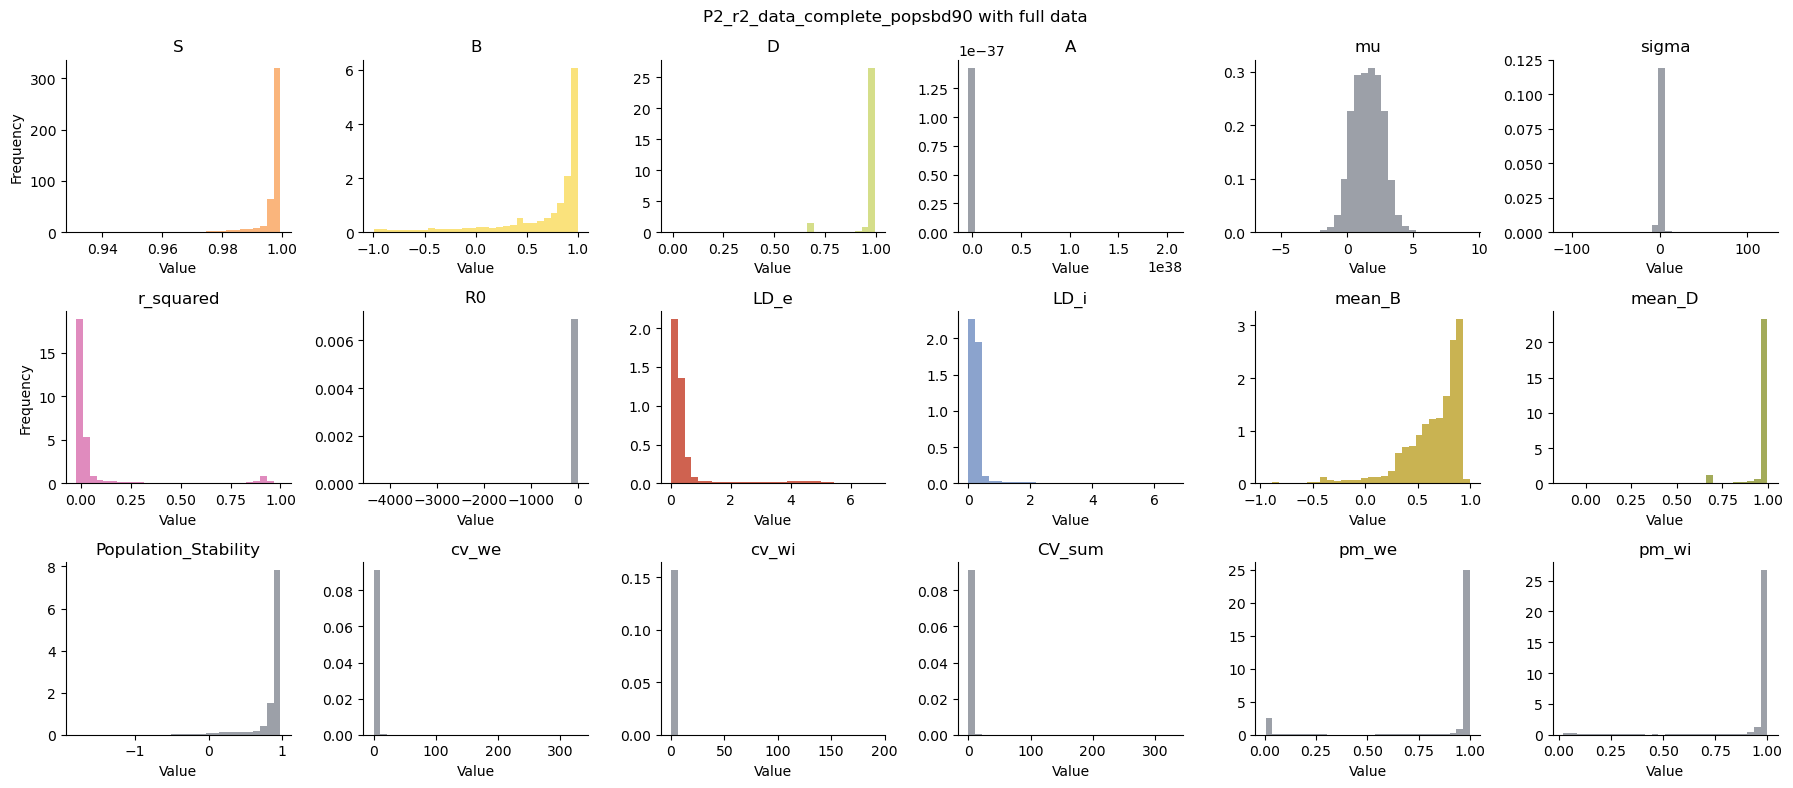

In [6]:
# S, B, D, A, mu, sigma, r_squared, R0, LD_e, LD_i, mean_B, mean_D, Population_Stability, cv_we, cv_wi, CV_sum,  pm_we, pm_wi
metrics = [x_P2_r2_notnan[:,i] for i in range(18)]
metrics_labels = ["S", "B", "D", "A", "mu", "sigma", "r_squared", "R0", "LD_e", "LD_i", "mean_B", "mean_D", "Population_Stability", "cv_we", "cv_wi", "CV_sum", "pm_we", "pm_wi"]
colors = ['#F89644', '#F8D644', '#C4D058', "#727884", "#727884", "#727884", "#D35AA3", "#727884",'#BB1F06', "#5A7CB9", "#B39309", "#7D8813", "#727884", "#727884", "#727884", "#727884", "#727884", "#727884"]
# Create a figure with 7 subplots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 8))

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()
# Plot each metric as a histogram in a different subplot
for i in range(18):
    ax = axes[i]
    ax.hist(metrics[i], bins=30, alpha=0.7, color=colors[i], density=True)
    ax.set_title(metrics_labels[i])
    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[6].set_ylabel('Frequency')
plt.suptitle(f'{data_name} with full data')
plt.tight_layout()
plt.show()

In [10]:
# FILTER FOR RSQRT
x_P2_r2[x_P2_r2[:, 6] > 0.9].shape

torch.Size([13798, 18])